In [2]:
import pandas as pd

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
import plotly.express as px

In [135]:
from scipy.stats import ttest_ind

# Data Inspection & Structure Understanding

**loading the dataset, inspecting its structure, and identifying:**

* Column types

* Missing values

* Basic statistics

* Redundant or duplicate entries


In [34]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv')

In [35]:
print("Shape Of DataSet:", df.shape)

Shape Of DataSet: (119390, 32)


In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [39]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [40]:
df.duplicated().sum()

31994

# Data Cleaning
- Duplicates
- Missing values

In [41]:
df.duplicated().sum()

31994

In [42]:
df=df.drop_duplicates()

In [43]:
df.duplicated().sum()

0

###  Removed Duplicate Rows
- Initially found **31,994** duplicate entries.
- Dropping them ensures each booking is counted only once.
- This improves accuracy in revenue calculations, guest counts, and further analytics.

In [44]:
# Detect duplicate columns by comparing all columns pairwise
duplicate_columns = []
cols = df.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            duplicate_columns.append((cols[i], cols[j]))

# Show column pairs that have identical values
duplicate_columns

[]

In [46]:
# Fill missing children values with 0
df['children']=df['children'].fillna(0)
df['children']


,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [50]:
# Fill missing country with the most frequent value
most_common_country = df['country'].mode()[0]
df['country']=df['country'].fillna(most_common_country)
df['country']


,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [49]:
# Fill agent and company IDs with 0 and convert to int
df['agent']=df['agent'].fillna(0)
df['agent'] = df['agent'].astype(int)

df['company']=df['company'].fillna(0)
df['company'] = df['company'].astype(int)


In [51]:
df['company']

,company
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


### Missing Values Cleaned

- **children** → Filled with 0 (only 4 missing)
- **country** → Filled with mode: most common nationality
- **agent** and **company** → Filled with 0 (denotes unknown)
- All critical fields now have no missing values


# Date Column Standardization

In [168]:
df = df.copy()
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month_name()
df['year_month'] = df['reservation_status_date'].dt.to_period('M').astype(str)


# Getting more fruitful Insights

In [55]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests']

,total_guests
0,2.0
1,2.0
2,1.0
3,1.0
4,2.0
...,...
119385,2.0
119386,3.0
119387,2.0
119388,2.0


In [53]:
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['stay_duration']


,stay_duration
0,0
1,0
2,1
3,1
4,2
...,...
119385,7
119386,7
119387,7
119388,7


In [56]:
df['room_change'] = df['reserved_room_type'] != df['assigned_room_type']
df['room_change']


,room_change
0,False
1,False
2,True
3,False
4,False
...,...
119385,False
119386,False
119387,False
119388,False


In [57]:
df['total_revenue'] = df['adr'] * df['stay_duration']
df['total_revenue']

,total_revenue
0,0.00
1,0.00
2,75.00
3,75.00
4,196.00
...,...
119385,672.98
119386,1578.01
119387,1103.97
119388,730.80


In [58]:
df['is_family'] = ((df['children'] + df['babies']) > 0).astype(int)
df['is_family']

,is_family
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


2a. Univariate Analysis (Distribution Exploration)

-- This step helps us understand individual variables — their shapes, outliers, and overall behavior.

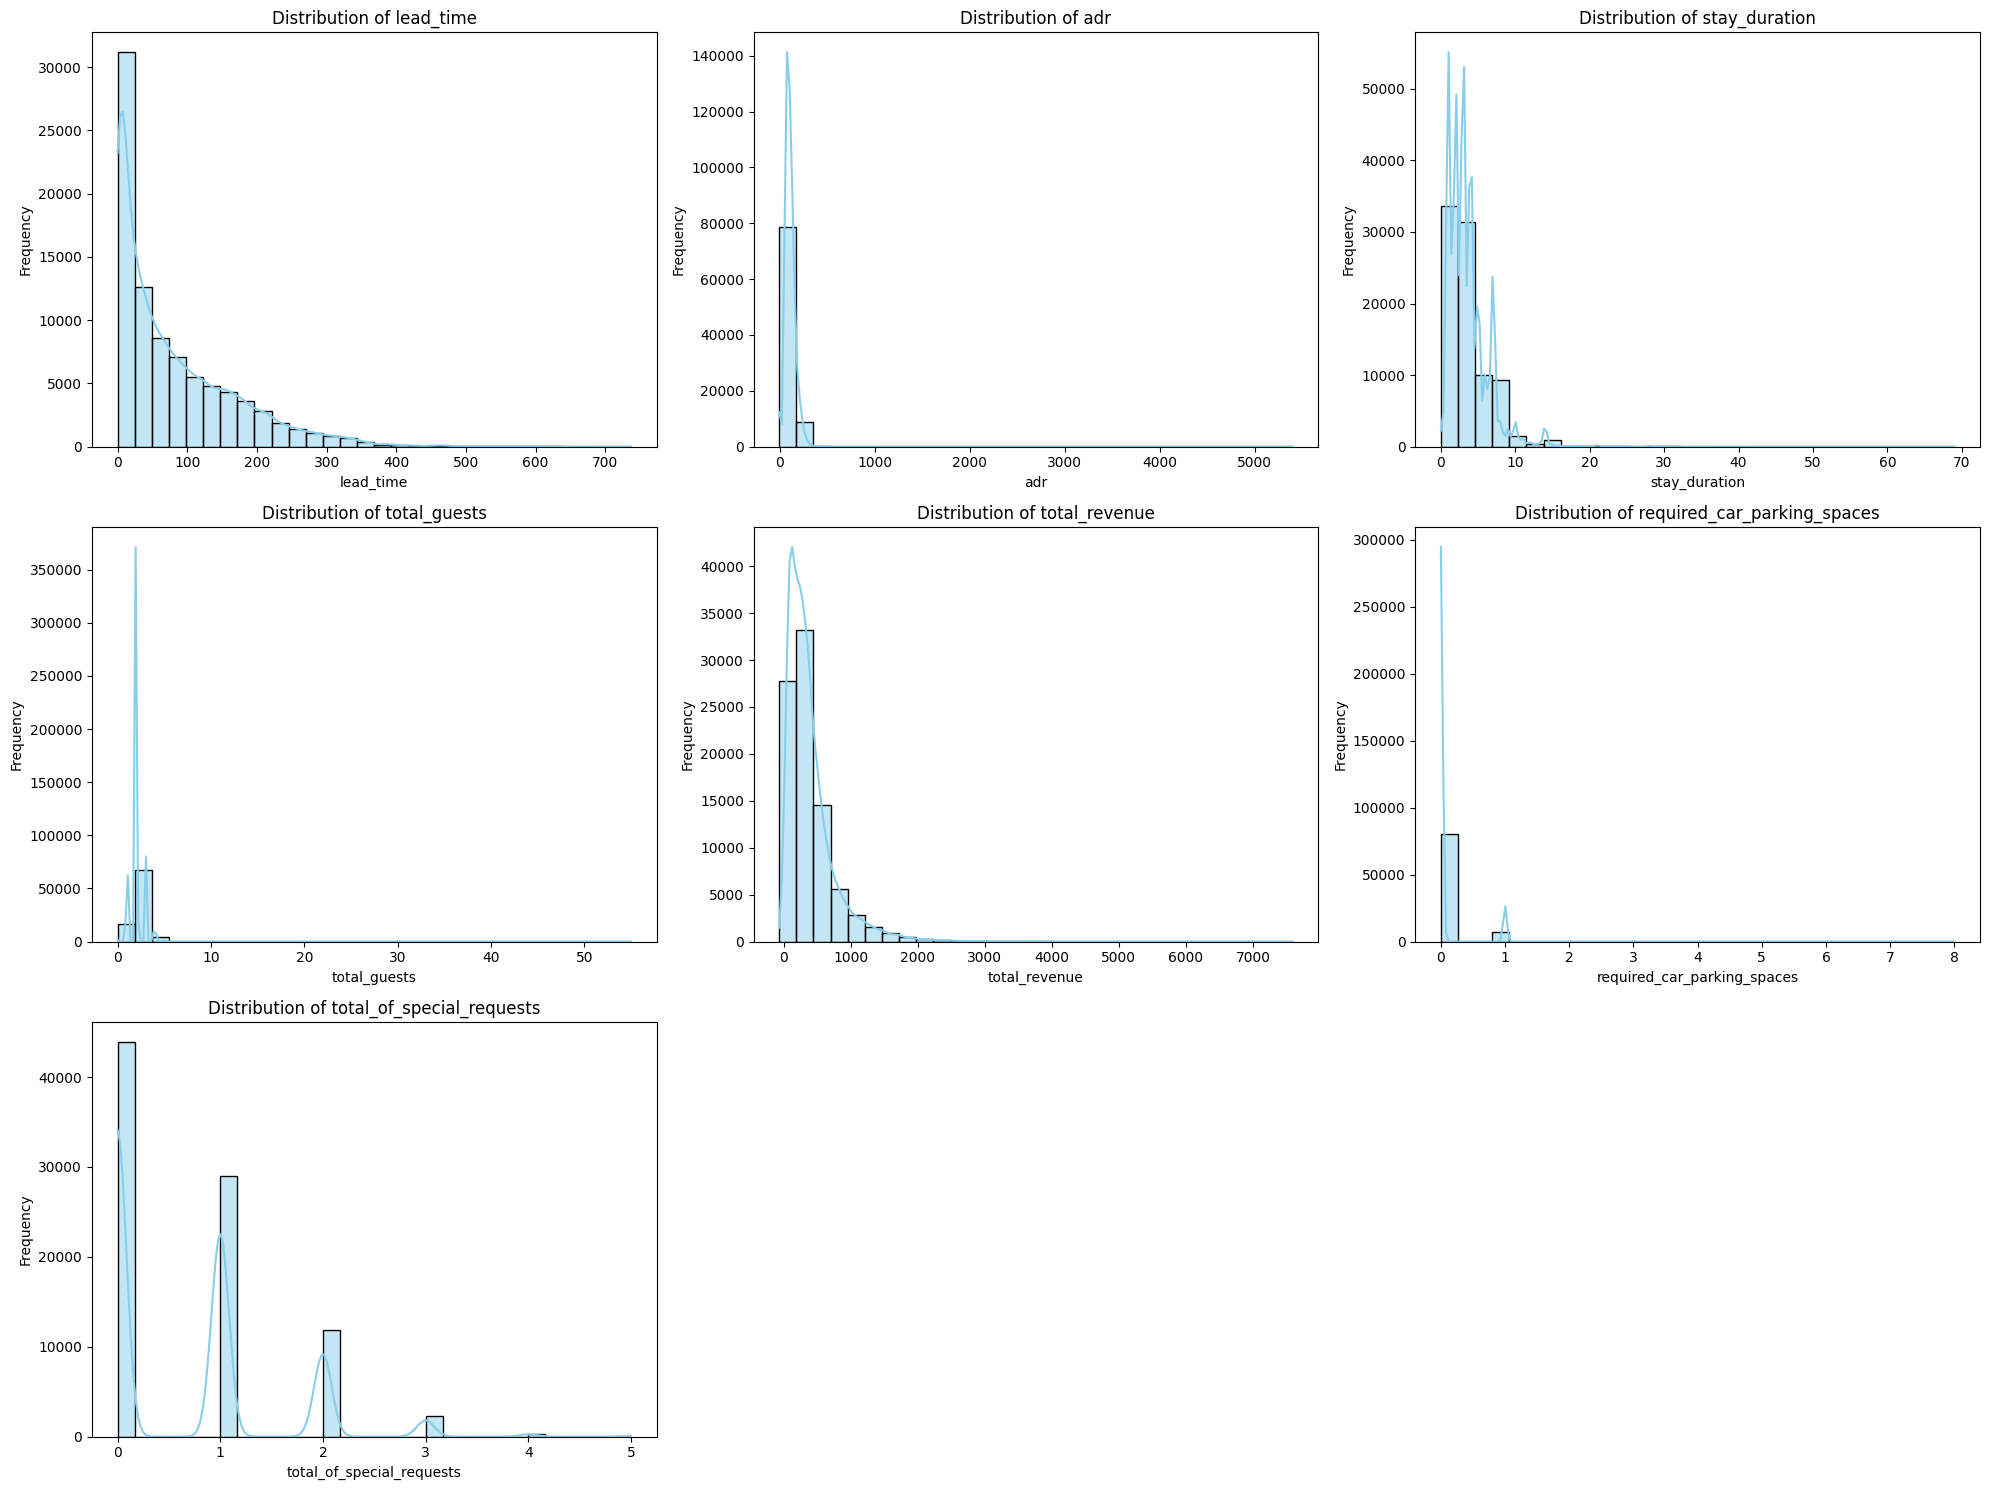

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to analyze
num_cols = ['lead_time', 'adr', 'stay_duration', 'total_guests', 'total_revenue',
            'required_car_parking_spaces', 'total_of_special_requests']

# Plot histograms for each
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

2B: Univariate Analysis – Categorical Variables
This helps us understand distributions and dominant categories, such as:

Which market segment books the most?

What’s the share of resort vs city hotel?

How often are deposits made?

Do most guests use online travel agents?

<ipython-input-76-43fd70545d3d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='hotel', order=order, palette='pastel')


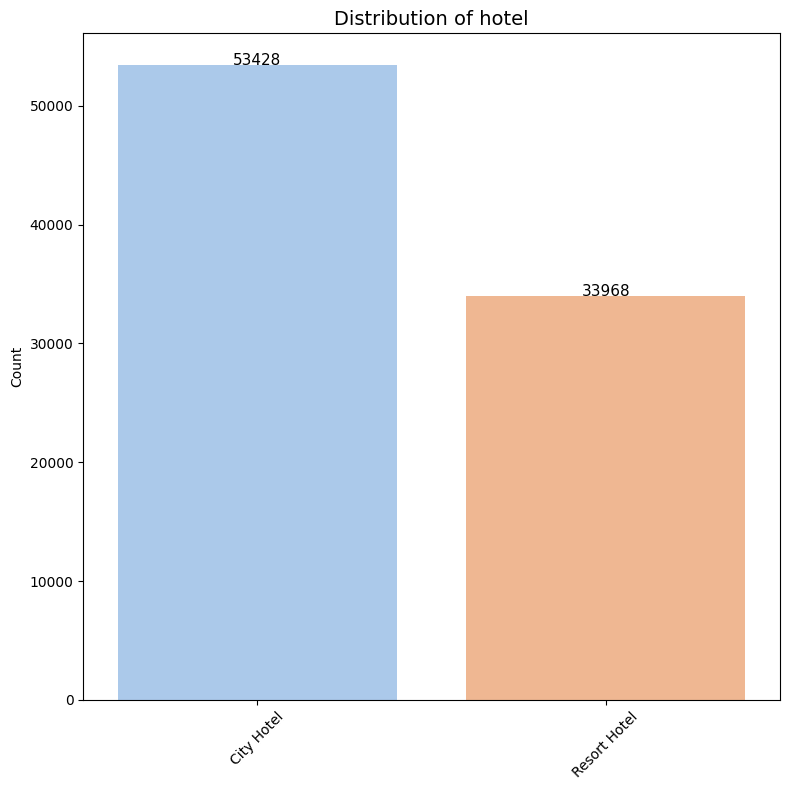

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
order = df['hotel'].value_counts().index
ax = sns.countplot(data=df, x='hotel', order=order, palette='pastel')
plt.title('Distribution of hotel', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-77-8427735a8e1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='is_canceled', order=order, palette='pastel')


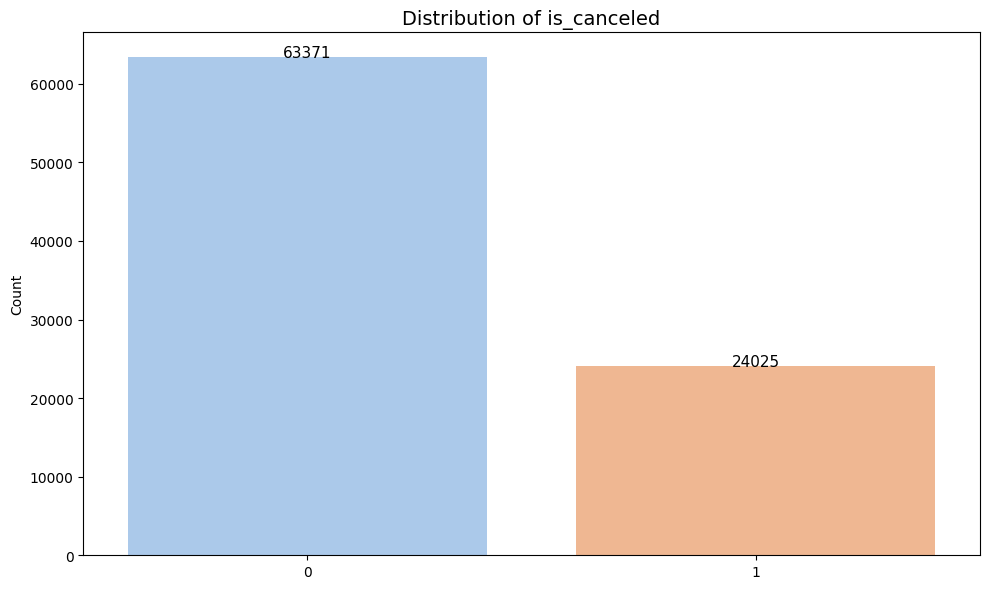

In [77]:
plt.figure(figsize=(10, 6))
order = df['is_canceled'].value_counts().index
ax = sns.countplot(data=df, x='is_canceled', order=order, palette='pastel')
plt.title('Distribution of is_canceled', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-78-dde33970e306>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='arrival_date_month', order=order, palette='pastel')


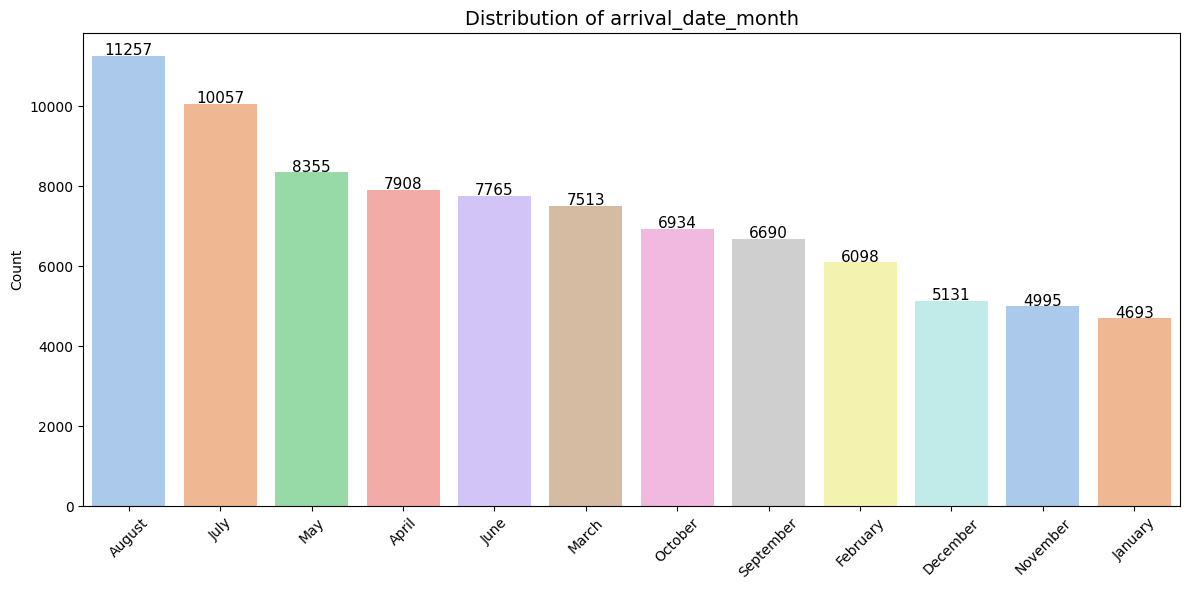

In [78]:
plt.figure(figsize=(12, 6))
order = df['arrival_date_month'].value_counts().index
ax = sns.countplot(data=df, x='arrival_date_month', order=order, palette='pastel')
plt.title('Distribution of arrival_date_month', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-79-dde33970e306>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='arrival_date_month', order=order, palette='pastel')


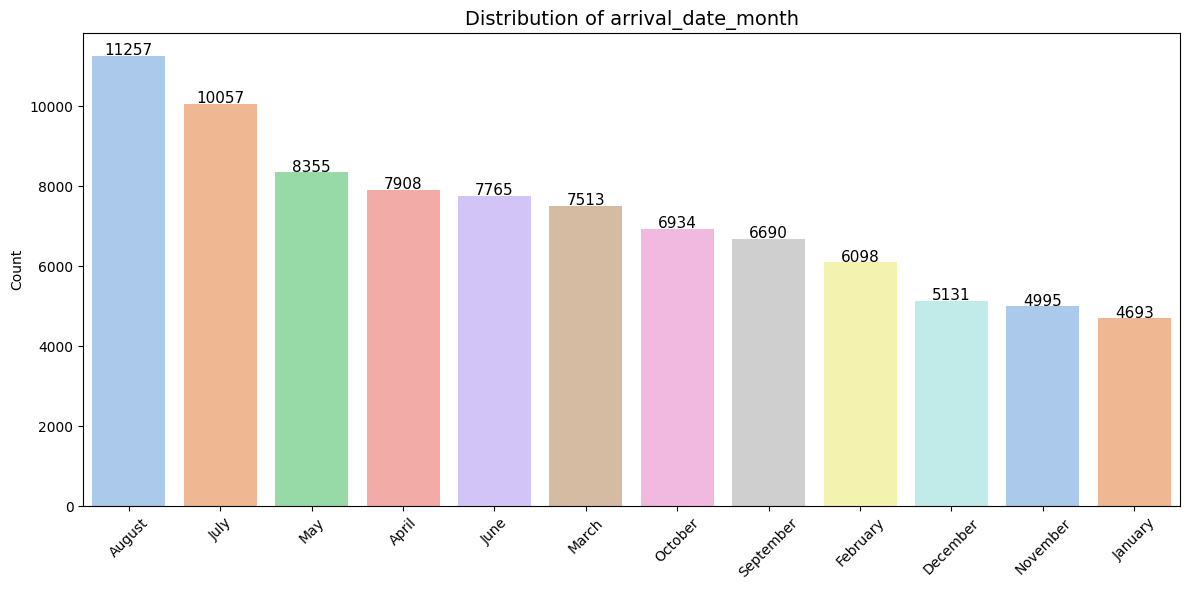

In [79]:
plt.figure(figsize=(12, 6))
order = df['arrival_date_month'].value_counts().index
ax = sns.countplot(data=df, x='arrival_date_month', order=order, palette='pastel')
plt.title('Distribution of arrival_date_month', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-80-c762159af123>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='market_segment', order=order, palette='pastel')


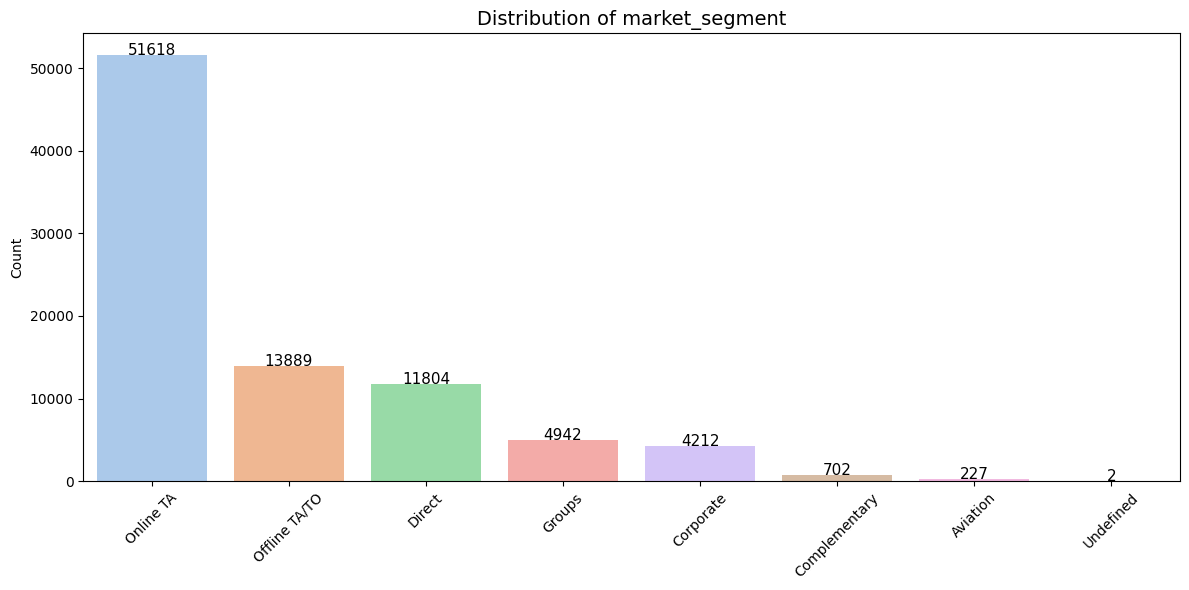

In [80]:
plt.figure(figsize=(12, 6))
order = df['market_segment'].value_counts().index
ax = sns.countplot(data=df, x='market_segment', order=order, palette='pastel')
plt.title('Distribution of market_segment', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-81-f0118101267d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='distribution_channel', order=order, palette='pastel')


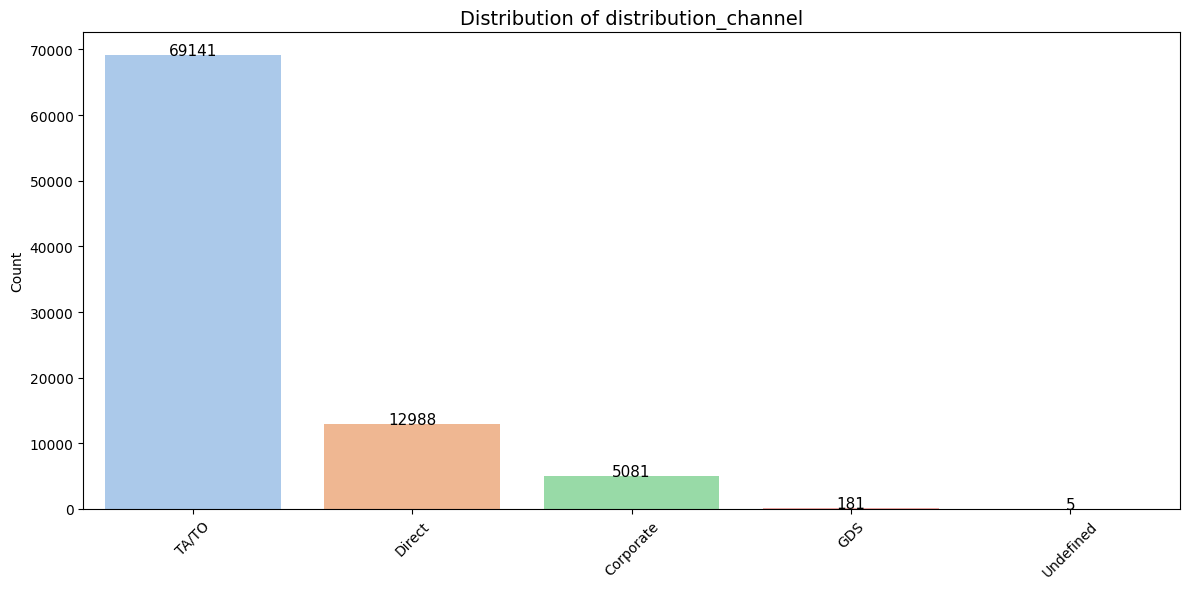

In [81]:
plt.figure(figsize=(12, 6))
order = df['distribution_channel'].value_counts().index
ax = sns.countplot(data=df, x='distribution_channel', order=order, palette='pastel')
plt.title('Distribution of distribution_channel', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-82-c985f838d45a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='deposit_type', order=order, palette='pastel')


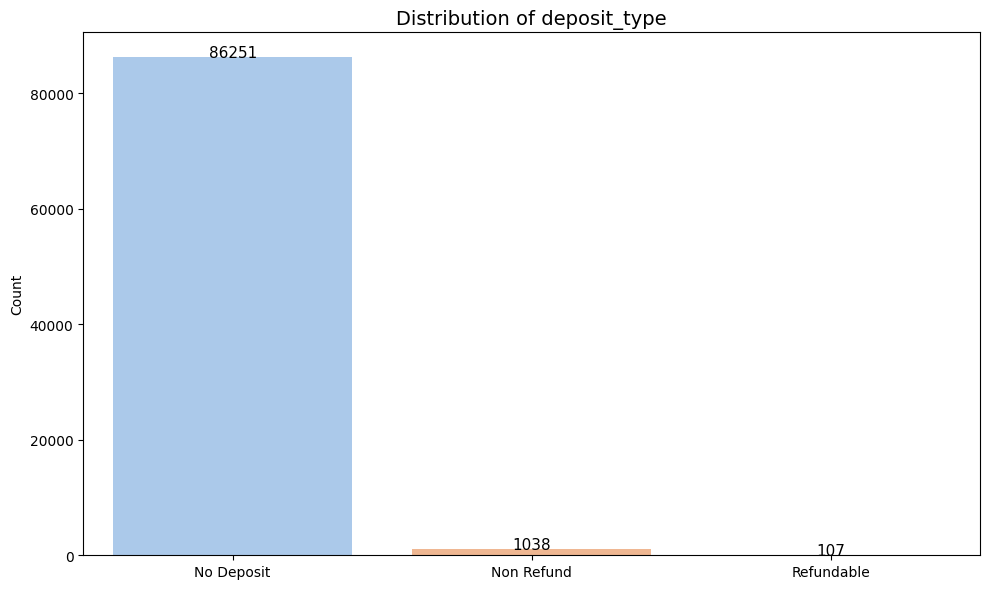

In [82]:
plt.figure(figsize=(10, 6))
order = df['deposit_type'].value_counts().index
ax = sns.countplot(data=df, x='deposit_type', order=order, palette='pastel')
plt.title('Distribution of deposit_type', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-85-53a5fc02d8d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='customer_type', order=order, palette='pastel')


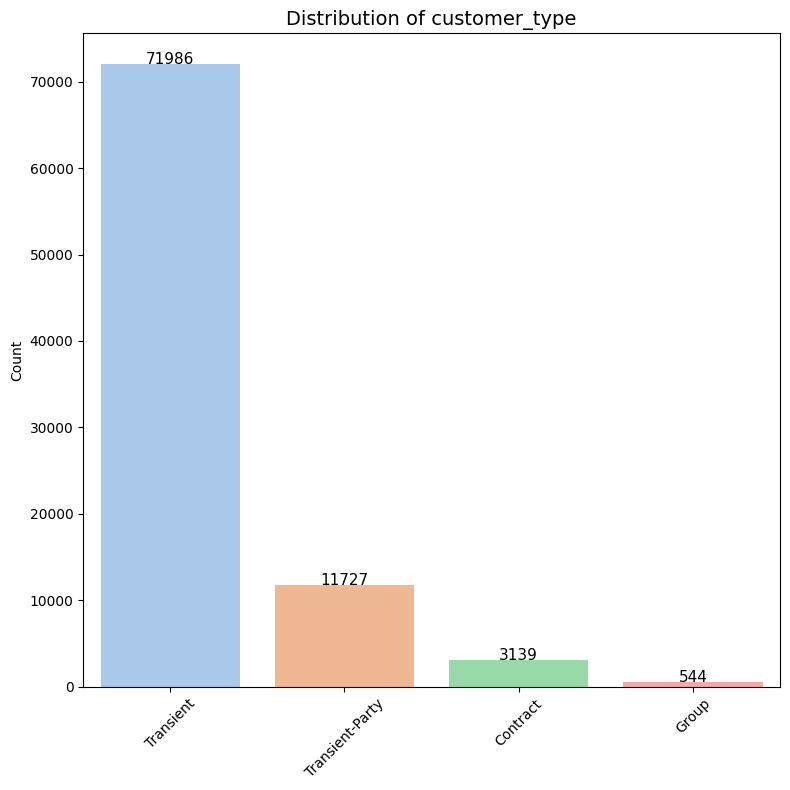

In [85]:
plt.figure(figsize=(8, 8))
order = df['customer_type'].value_counts().index
ax = sns.countplot(data=df, x='customer_type', order=order, palette='pastel')
plt.title('Distribution of customer_type', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-86-a398983b7adf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='reserved_room_type', order=order, palette='pastel')


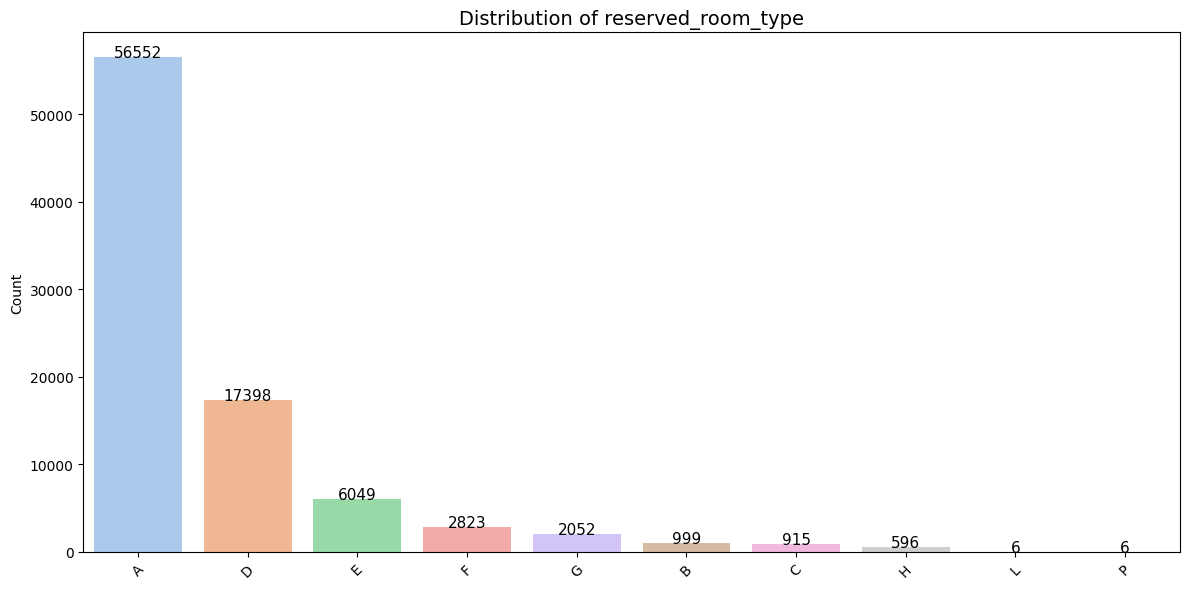

In [86]:
plt.figure(figsize=(12, 6))
order = df['reserved_room_type'].value_counts().index
ax = sns.countplot(data=df, x='reserved_room_type', order=order, palette='pastel')
plt.title('Distribution of reserved_room_type', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<ipython-input-87-efd1cca4d43a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='assigned_room_type', order=order, palette='pastel')


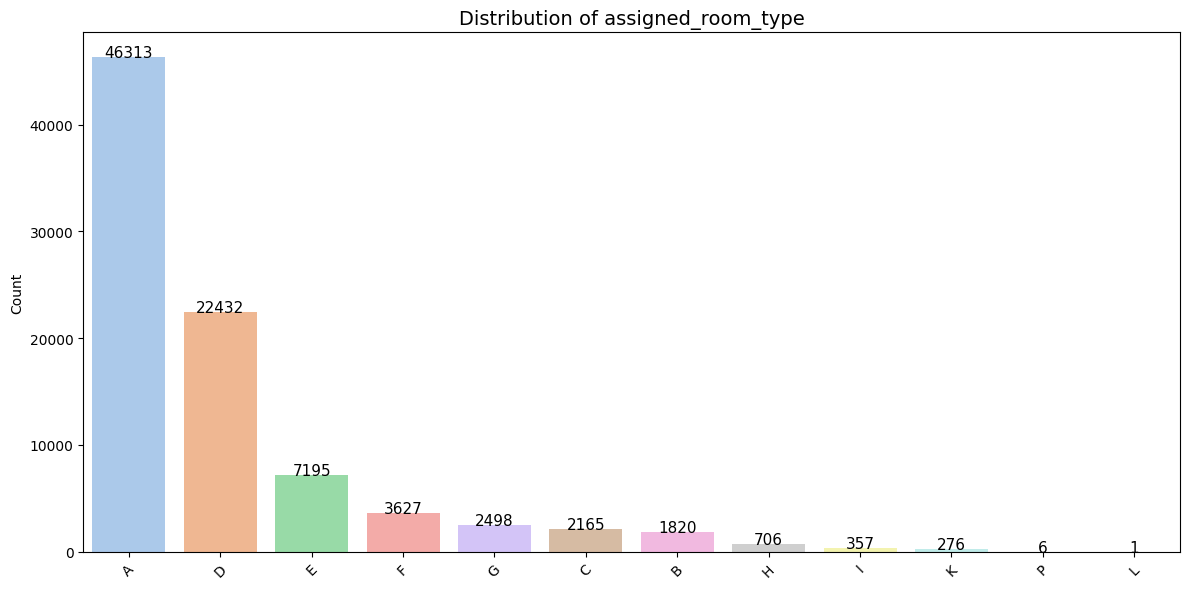

In [87]:
plt.figure(figsize=(12, 6))
order = df['assigned_room_type'].value_counts().index
ax = sns.countplot(data=df, x='assigned_room_type', order=order, palette='pastel')
plt.title('Distribution of assigned_room_type', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


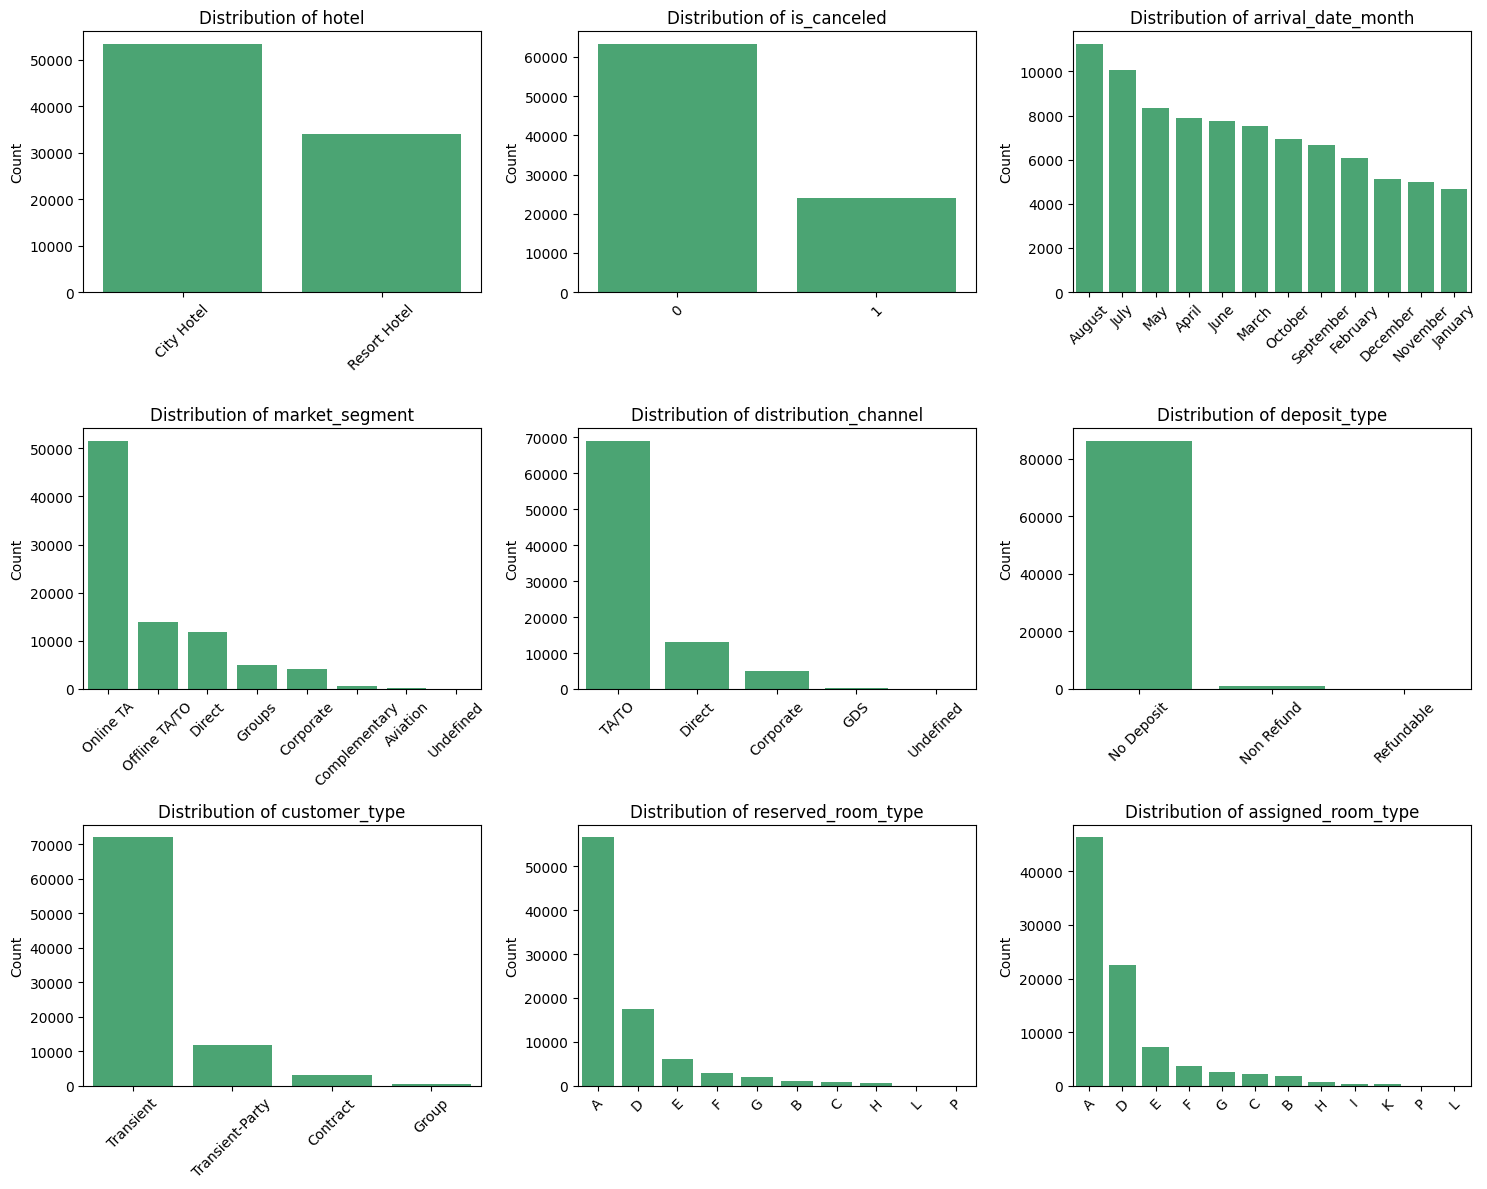

In [103]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, color='mediumseagreen')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


#Step 2: Bivariate Analysis - Market Segment Share and ADR Comparison

 Market Segment Share

<ipython-input-109-eacae5db4eff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seg_counts, x='segment', y='count', palette='pastel')


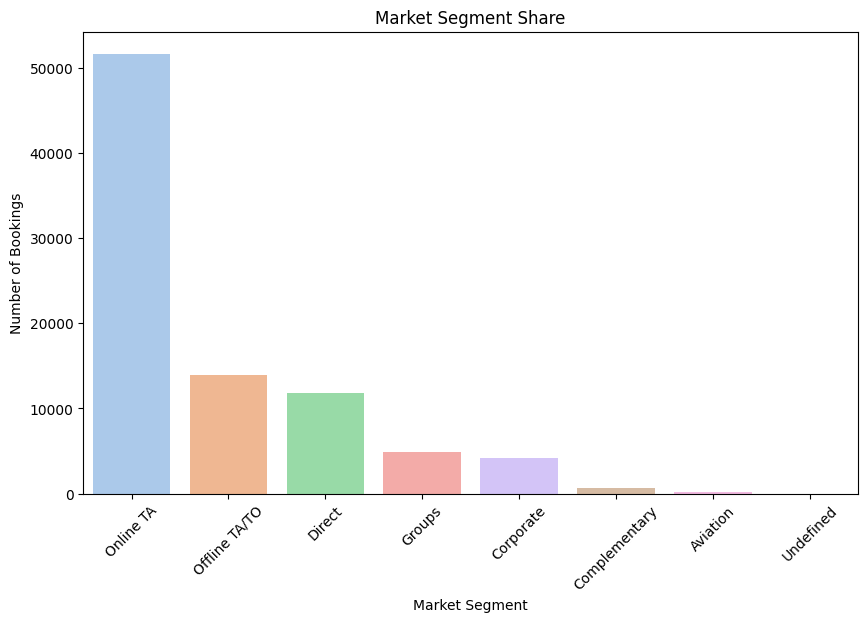

In [109]:

seg_counts = df['market_segment'].value_counts().reset_index()
seg_counts.columns = ['segment', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=seg_counts, x='segment', y='count', palette='pastel')
plt.title('Market Segment Share')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


Shows how many bookings come from each market segment, revealing which channels are driving most reservations.

2. Guest Distribution by Country (Top 15 countries)

<ipython-input-110-032ecab9def7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x='country', y='count', palette='pastel')


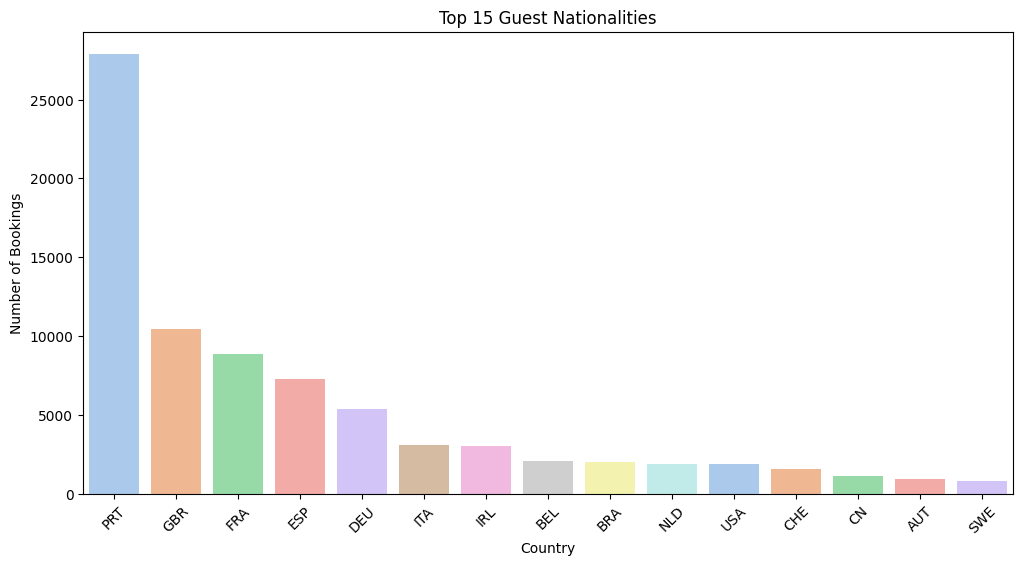

In [110]:
country_counts = df['country'].value_counts().head(15).reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(12,6))
sns.barplot(data=country_counts, x='country', y='count', palette='pastel')
plt.title('Top 15 Guest Nationalities')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


Highlights the top 15 countries guests come from, helping identify key source markets for the hotel.

3. ADR Comparison by Market Segment

<ipython-input-111-f78b6edfde90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='market_segment', y='adr', palette='pastel')


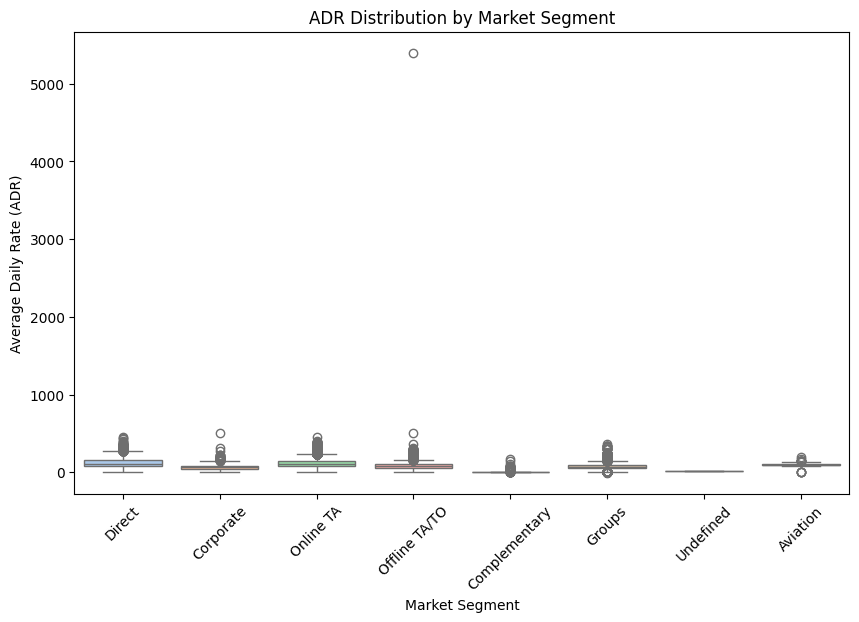

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='market_segment', y='adr', palette='pastel')
plt.title('ADR Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()


Compares the distribution of Average Daily Rate (ADR) across different market segments, indicating which segments generate higher revenue.



4. Booking Lead Time Distribution by Customer Type

<ipython-input-112-a18971e51a2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='customer_type', y='lead_time', palette='pastel')


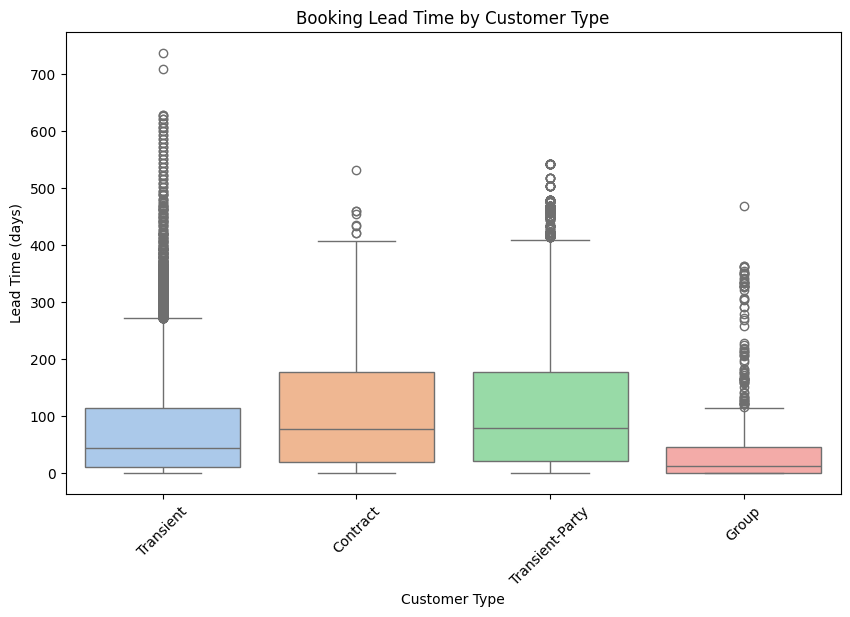

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='customer_type', y='lead_time', palette='pastel')
plt.title('Booking Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.show()


Shows how far in advance different customer types book, which helps in forecasting and marketing strategies.

5. ADR by Customer Type

<ipython-input-113-52c424341c3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='customer_type', y='adr', palette='pastel')


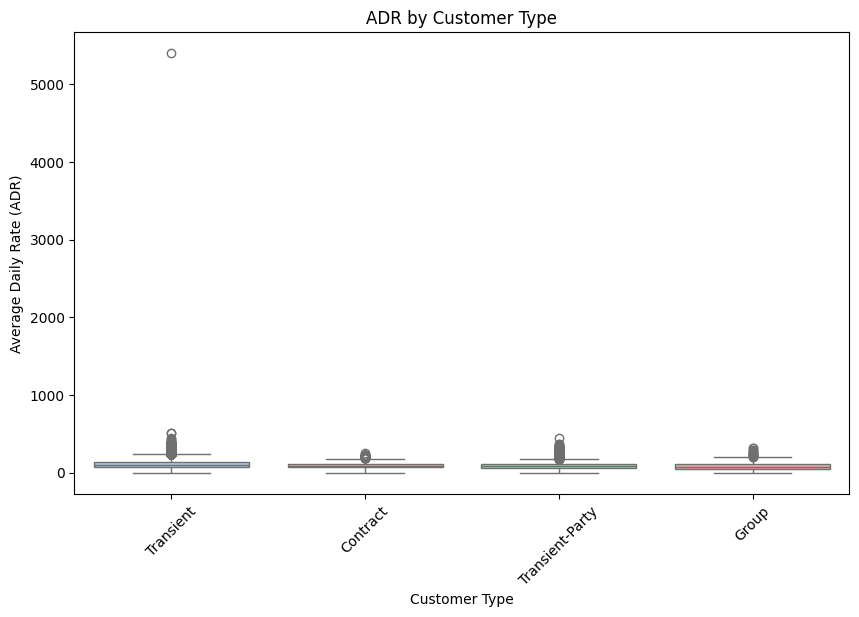

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='customer_type', y='adr', palette='pastel')
plt.title('ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()


Displays the ADR variations across customer types, helping understand revenue contribution by different guest segments.

6. Stay Duration by Market Segment

<ipython-input-114-e1c183b41915>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='market_segment', y='stay_duration', palette='pastel')


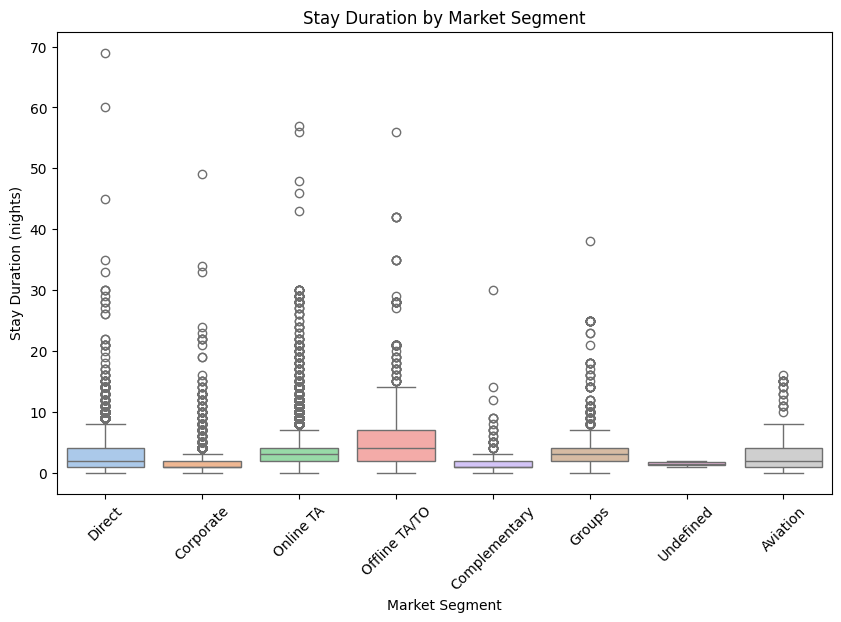

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='market_segment', y='stay_duration', palette='pastel')
plt.title('Stay Duration by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Stay Duration (nights)')
plt.xticks(rotation=45)
plt.show()


Analyzes how long guests stay based on market segment, useful for understanding customer behavior and planning operations.

7. Total Special Requests by Customer Type

<ipython-input-115-a1e5769a57c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='customer_type', y='total_of_special_requests', palette='pastel')


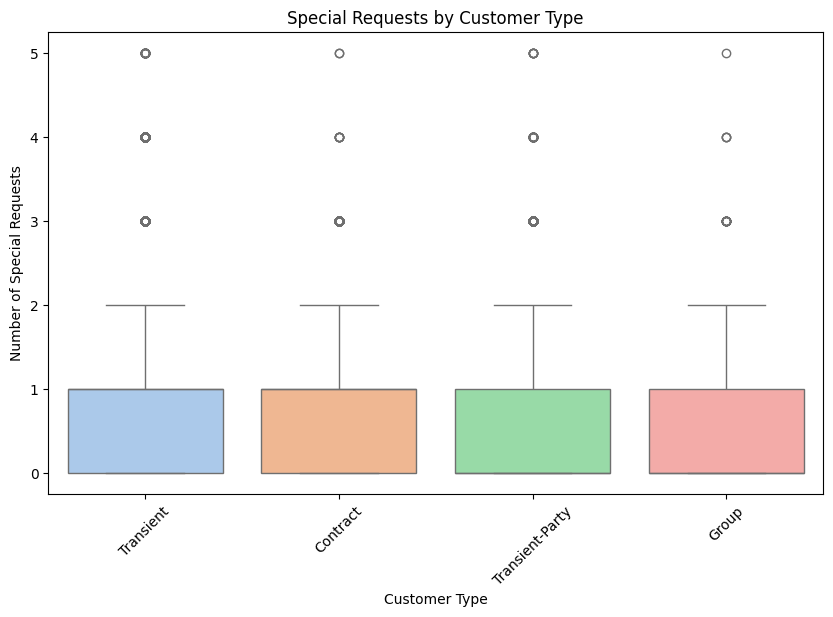

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='customer_type', y='total_of_special_requests', palette='pastel')
plt.title('Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Special Requests')
plt.xticks(rotation=45)
plt.show()


Compares special request frequency across customer types, useful to identify which groups require more personalized service.

#Time-series analysis of booking trends

Convert reservation_status_date to datetime

In [116]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


Step 2: Monthly Booking Counts (using reservation_status_date)
 Aggregate Bookings Over Time
We’ll create a time series of total bookings per month

<ipython-input-117-b02be5027399>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bookings_monthly = df.groupby(pd.Grouper(key='reservation_status_date', freq='M')).size().reset_index(name='bookings')


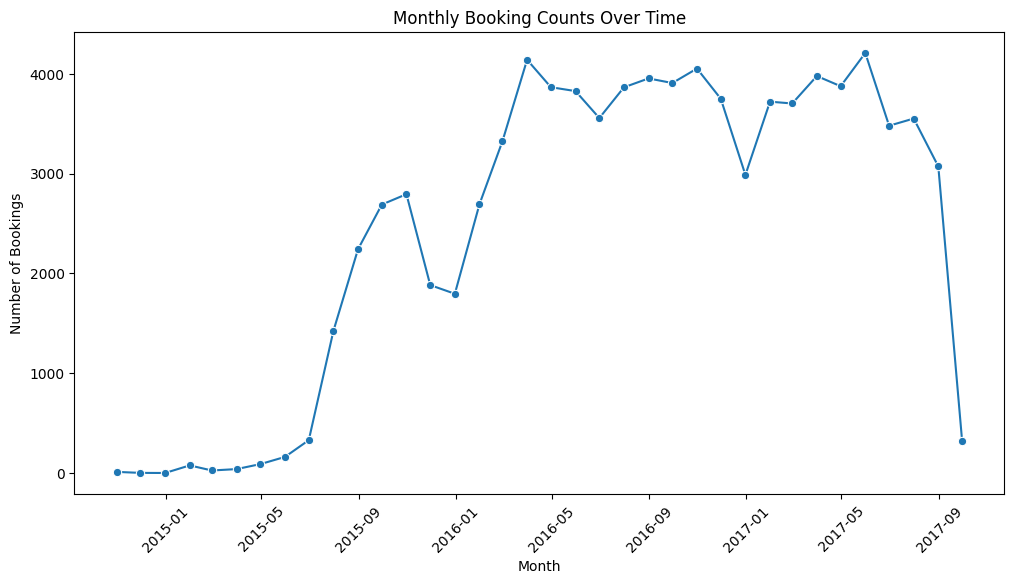

In [117]:
bookings_monthly = df.groupby(pd.Grouper(key='reservation_status_date', freq='M')).size().reset_index(name='bookings')

plt.figure(figsize=(12,6))
sns.lineplot(data=bookings_monthly, x='reservation_status_date', y='bookings', marker='o')
plt.title('Monthly Booking Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


This plot shows booking volume trends month by month — helps detect seasonal patterns, peak times, or dips.

Step 3: Bookings by Market Segment Over Time
Visualize how each market segment contributes monthly.

<ipython-input-118-735db9067dd3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bookings_segment_month = df.groupby([pd.Grouper(key='reservation_status_date', freq='M'), 'market_segment']).size().reset_index(name='bookings')


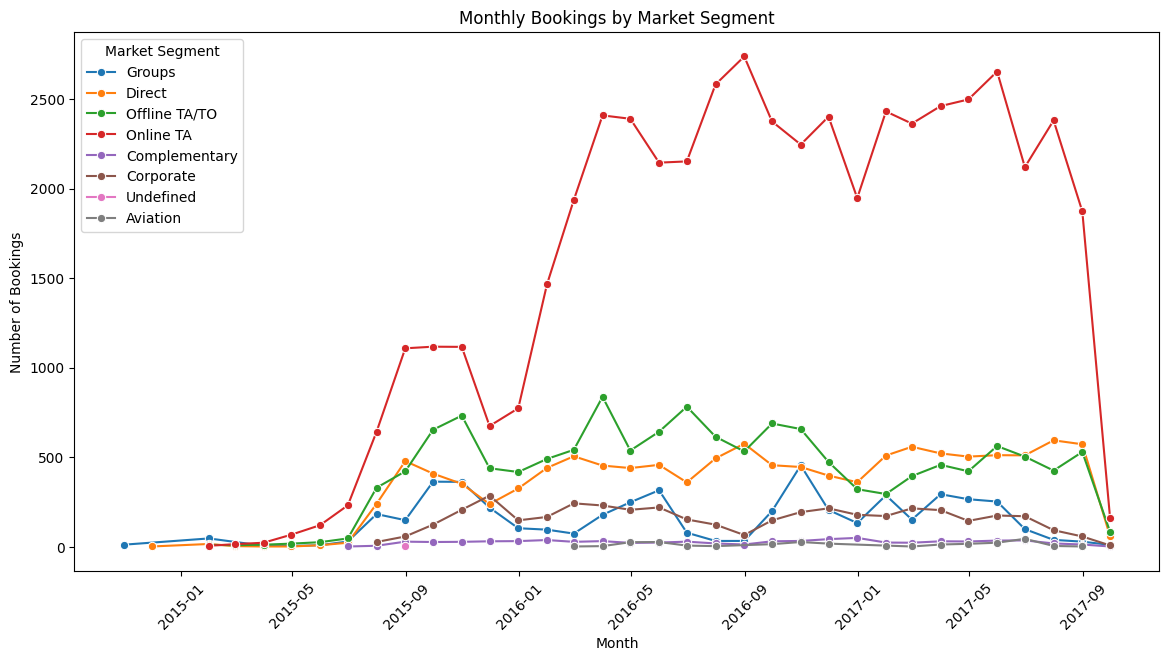

In [118]:
# Aggregate bookings by market segment per month
bookings_segment_month = df.groupby([pd.Grouper(key='reservation_status_date', freq='M'), 'market_segment']).size().reset_index(name='bookings')

plt.figure(figsize=(14,7))
sns.lineplot(data=bookings_segment_month, x='reservation_status_date', y='bookings', hue='market_segment', marker='o')
plt.title('Monthly Bookings by Market Segment')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Market Segment')
plt.show()


Shows how booking channels fluctuate over time — useful to target marketing efforts.

Step 4: Average Daily Rate (ADR) Over Time
- Track ADR trends to understand pricing dynamics.

<ipython-input-119-6a38e22f74b8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  adr_month = df.groupby(pd.Grouper(key='reservation_status_date', freq='M'))['adr'].mean().reset_index()


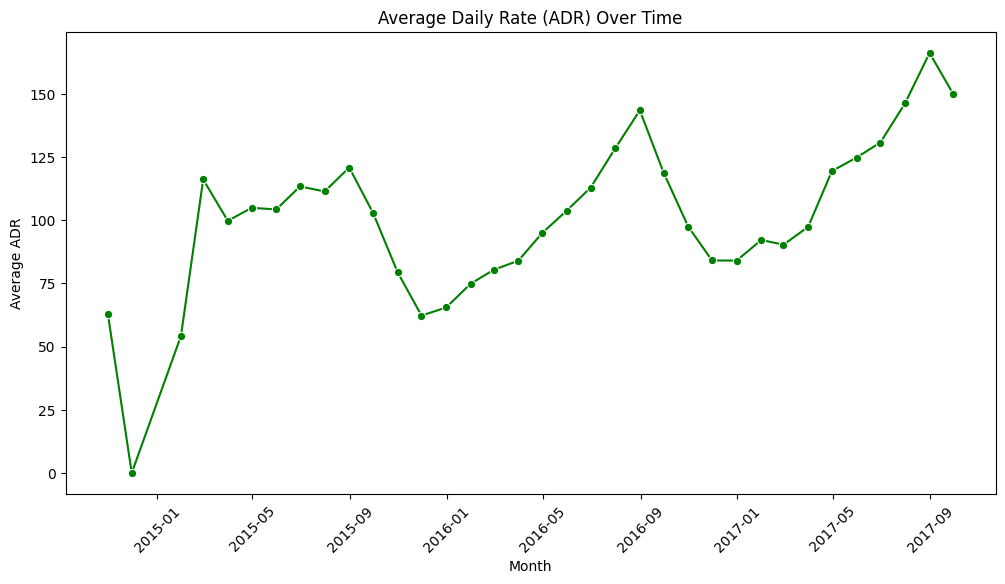

In [119]:
adr_month = df.groupby(pd.Grouper(key='reservation_status_date', freq='M'))['adr'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=adr_month, x='reservation_status_date', y='adr', marker='o', color='green')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.show()


Monitoring ADR trends month to month helps understand revenue changes and price adjustments impact.

Step 5: Bookings by Customer Type Over Time

<ipython-input-120-ffb5e805e737>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bookings_cust_type = df.groupby([pd.Grouper(key='reservation_status_date', freq='M'), 'customer_type']).size().reset_index(name='bookings')


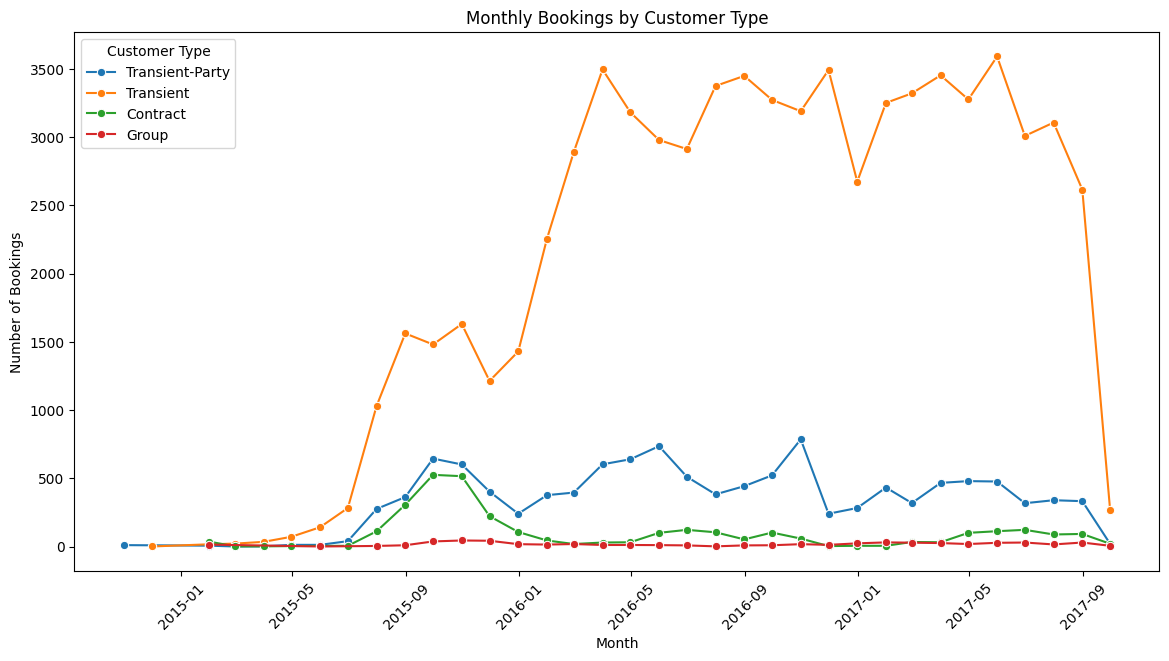

In [120]:
bookings_cust_type = df.groupby([pd.Grouper(key='reservation_status_date', freq='M'), 'customer_type']).size().reset_index(name='bookings')

plt.figure(figsize=(14,7))
sns.lineplot(data=bookings_cust_type, x='reservation_status_date', y='bookings', hue='customer_type', marker='o')
plt.title('Monthly Bookings by Customer Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()


Tracks how different customer types vary over time — helps tailor offers and services.

#Guest Demographics by Country

Top 10 Countries by Number of Bookings

<ipython-input-122-791a4a1e2858>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='country', y='bookings', palette='viridis')


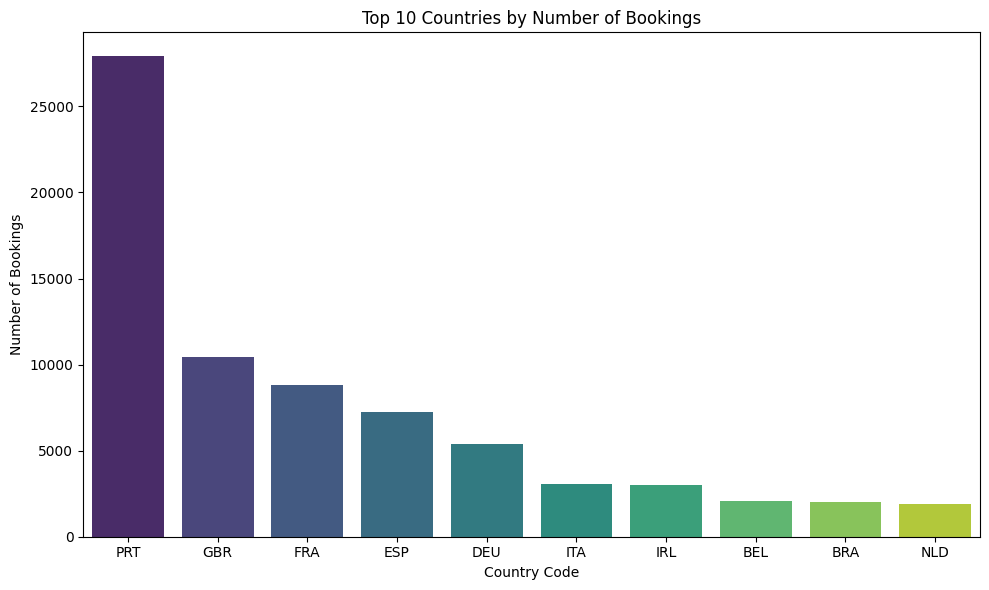

In [122]:
# Count bookings by country
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'bookings']

# Barplot of top countries
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='country', y='bookings', palette='viridis')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country Code')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


Top 10 countries from which guests made bookings. Helps in identifying key international markets.

#Market segment share and ADR comparison

This helps us understand which segments (e.g., Online TA, Direct, Corporate) contribute the most bookings.

<ipython-input-125-dea25c3e629b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




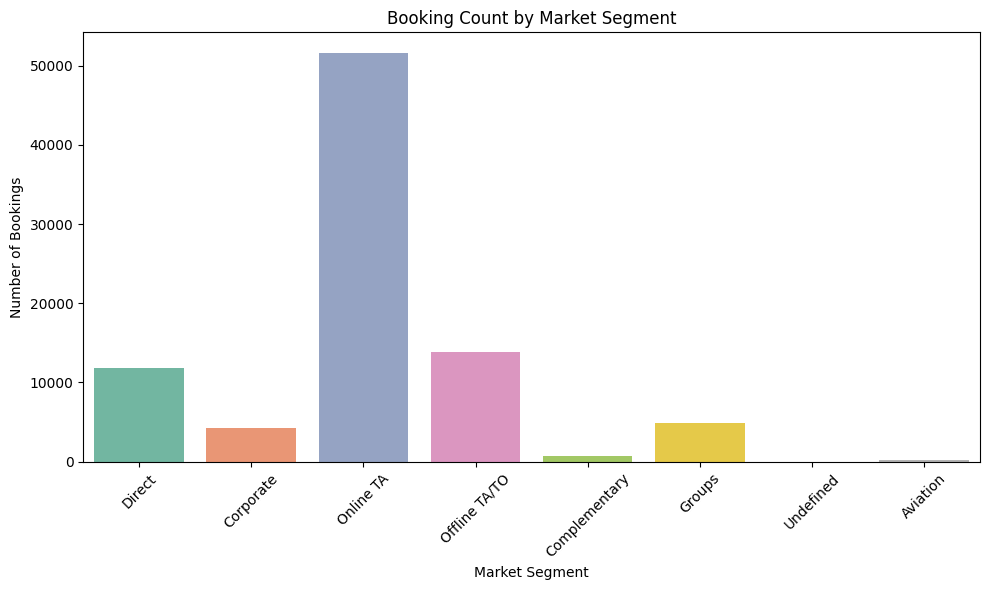

In [125]:
# Countplot for market segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment', palette='Set2')
plt.title('Booking Count by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visual distribution of bookings by each market segment. Useful to see where most guests are coming from.

2.Average ADR by Market Segment
This checks which segments bring more revenue per night.

<ipython-input-126-ee0265f7820c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




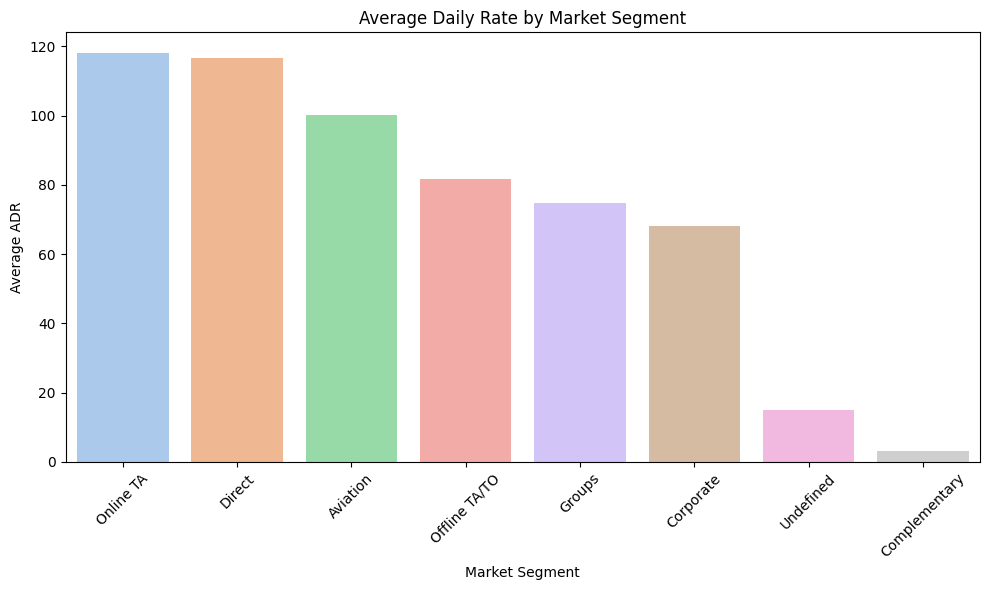

In [126]:
# Group ADR by market segment
adr_segment = df.groupby('market_segment')['adr'].mean().reset_index().sort_values(by='adr', ascending=False)

# Barplot of ADR per segment
plt.figure(figsize=(10, 6))
sns.barplot(data=adr_segment, x='market_segment', y='adr', palette='pastel')
plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This tells us which market segments are the most profitable per booking. Even if a segment has fewer bookings, a higher ADR might make it more valuable.

3. Boxplot for ADR Distribution by Segment

<ipython-input-127-697a9f50cebe>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




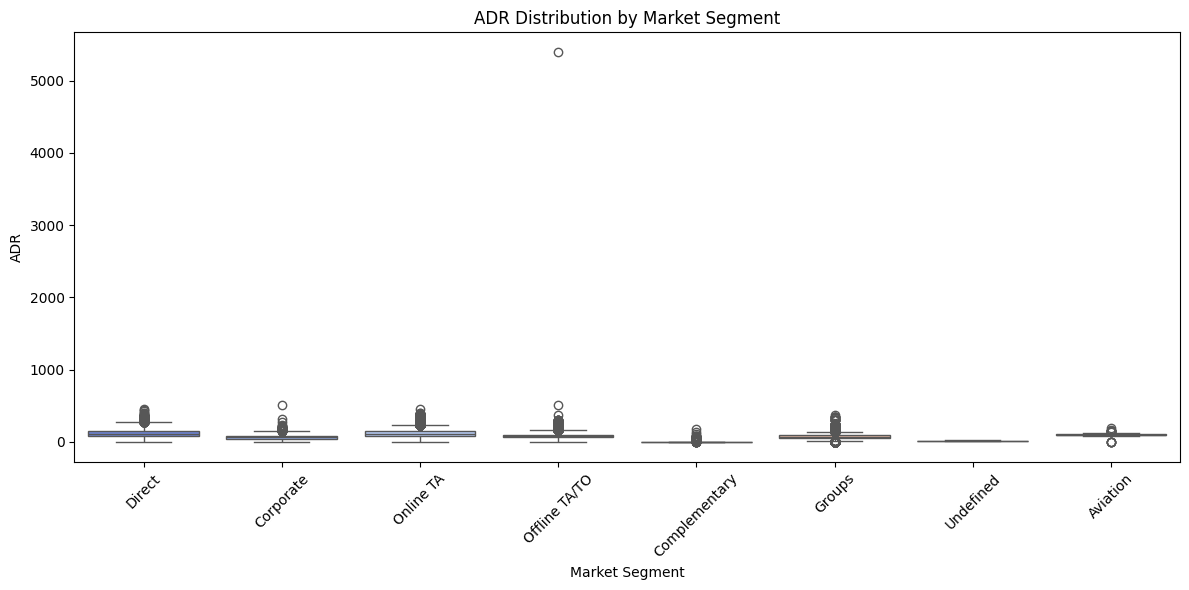

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment', y='adr', palette='coolwarm')
plt.title('ADR Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What it shows:

Wider boxes: more variability in prices.

Outliers: extremely high prices in some segments.

Helps detect pricing inconsistencies or identify premium-paying segments.



#Booking Lead Time Distribution Across Customer Types

Do different customer types (like Transient, Contract, Group) book far in advance or last-minute?”

1: Boxplot — Lead Time vs Customer Type

<ipython-input-128-4ba333a30a3a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




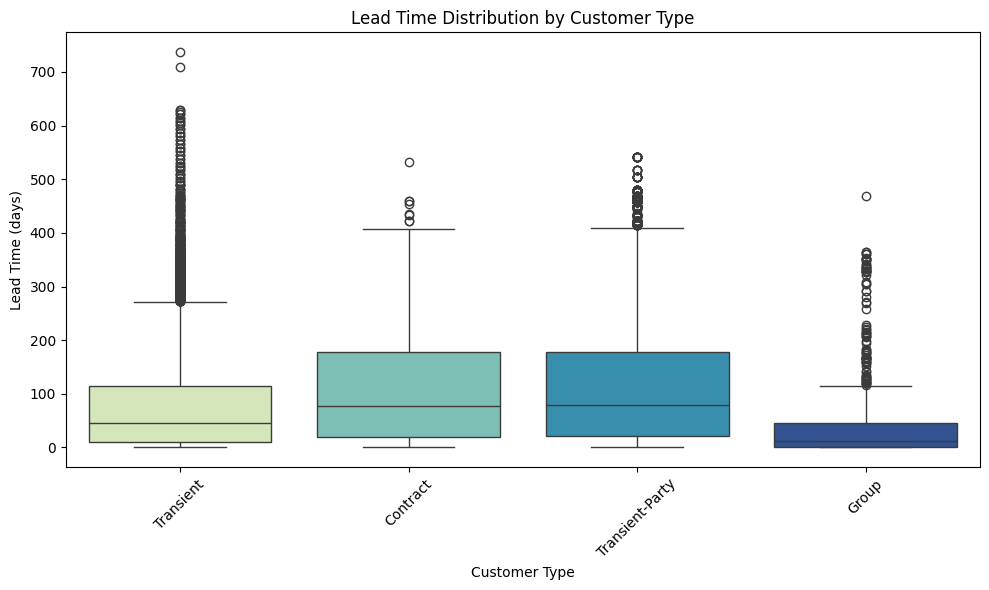

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_type', y='lead_time', palette='YlGnBu')
plt.title('Lead Time Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What it shows:

The median lead time for each customer type.

Spread (IQR = interquartile range) and outliers.

For example, Contract customers might have shorter lead times, while Transient guests may plan early.

This analysis highlights how lead time behavior varies by customer type.
For instance:

Transient customers typically book with longer lead times, indicating flexible or vacation-oriented planning.

Contract and Group bookings show tighter lead-time ranges, suggesting last-minute or pre-arranged corporate/group deals.

This insight can inform inventory planning and discount strategy (e.g., early bird offers for transient guests).

#3. Correlation Analysis
Compute Pearson/Spearman correlation matrix for numeric feature. Visualize correlations using
heatmaps to detect multicollinearity. Explore how strongly adr is influenced by lead time, special
requests, and booking changes

In [130]:
# Select only numeric columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stay_duration,total_guests,total_revenue,is_family
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,0.0,0,0,0,2.0,0.0,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,0.0,0,0,0,2.0,0.0,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,75.0,0,0,1,1.0,75.0,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,304,0,0,75.0,0,0,1,1.0,75.0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,240,0,0,98.0,0,1,2,2.0,196.0,0


Compute Pearson Correlation Matrix
- pearson is used when data is linear and normally distributed.

In [131]:
# Pearson correlation matrix
corr_pearson = df_num.corr(method='pearson')


Heatmap
We'll use a heatmap to visualize correlations.

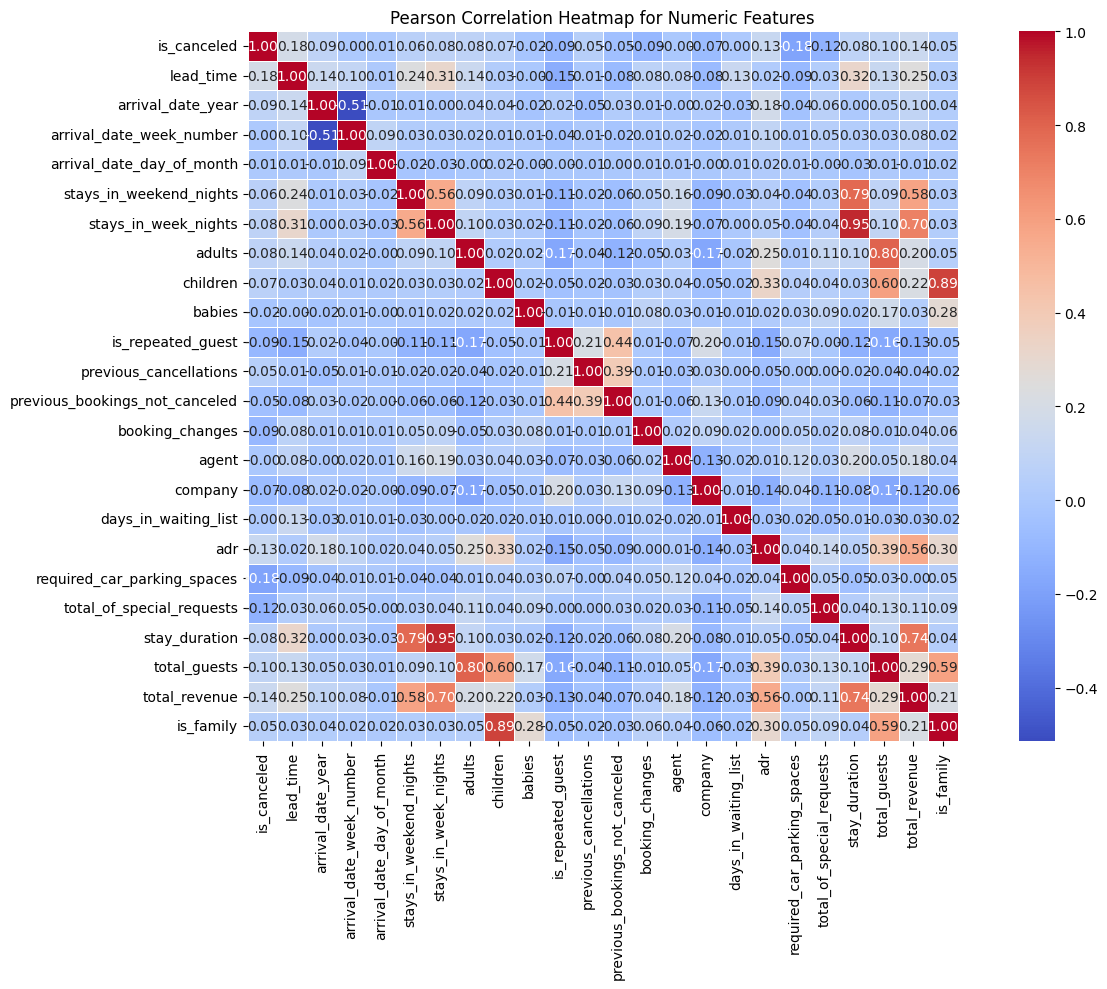

In [138]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Pearson Correlation Heatmap for Numeric Features')
plt.tight_layout()
plt.show()


Dark red = strong positive correlation

Dark blue = strong negative correlation

Near 0 = weak or no linear relationship

ADR Relationships

<ipython-input-133-27c1212f728a>:10: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



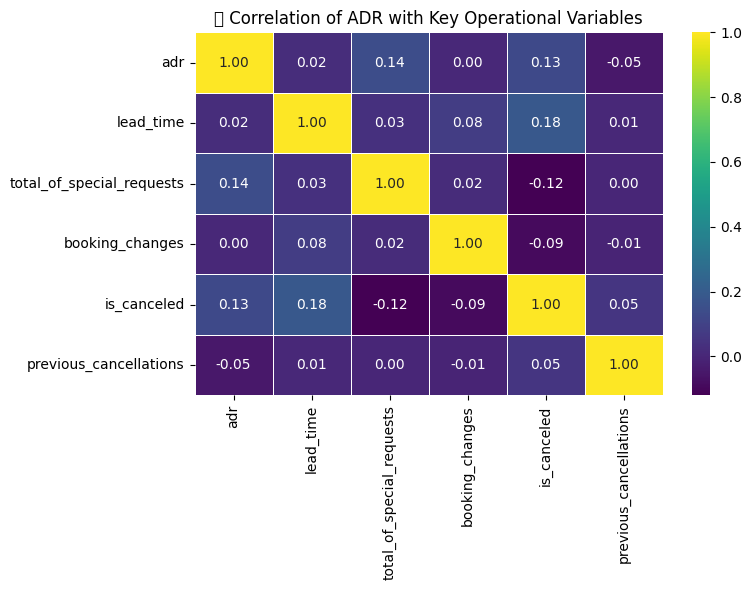

In [133]:
# ADR-focused correlation
focus_cols = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes',
              'is_canceled', 'previous_cancellations']

adr_corr = df_num[focus_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(adr_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('🔍 Correlation of ADR with Key Operational Variables')
plt.tight_layout()
plt.show()


The heatmaps above show the linear relationships among numerical variables.

Key takeaways:

lead_time has a weak positive correlation with adr → guests booking earlier may be paying slightly more.

total_of_special_requests is positively correlated with adr, implying guests requesting extra services tend to pay more.

is_canceled shows a negative correlation with adr, meaning low-value bookings are more likely to get canceled.

booking_changes and previous_cancellations have weak relationships with adr, suggesting less direct influence.

#4.  Hypothesis Testing
Use statistical tests to validate business assumptions:
H0: There is no difference in ADR between bookings made through Online TA and Direct
channels
H0: Room upgrades are independent of lead time
H0: Average stay duration does not differ between customer types

General Flow of Hypothesis Testing
For each hypothesis:

State H₀ and H₁

Choose the right test based on variable types.

Check assumptions (normality, independence, etc.)

Perform the test.

Interpret p-value and conclud

Hypothesis 1: ADR differs across Booking Channels
H₀: There is no difference in ADR between Online TA and Direct channels
H₁: There is a difference in ADR between them

Type of Test: Independent t-test (comparing means between 2 groups)

python
Copy
Edit


In [134]:
from scipy.stats import ttest_ind

# Filter data for Online TA and Direct
online_ta = df[df['distribution_channel'] == 'TA/TO']['adr']
direct = df[df['distribution_channel'] == 'Direct']['adr']

# Perform t-test
t_stat, p_val = ttest_ind(online_ta, direct, equal_var=False, nan_policy='omit')

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.4f}")


T-Statistic: -0.97
P-Value: 0.3318


Interpretation:
If p-value < 0.05, reject H₀ → significant difference in ADR between the two channels.

If p-value ≥ 0.05, fail to reject H₀ → no strong evidence of difference.

ypothesis 2: Room Upgrade vs Lead Time — Chi-Square Test

H₀: Room upgrade is independent of lead time category

H₁: Room upgrade is dependent


In [136]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Define upgrade flag
df['is_upgraded'] = (df['reserved_room_type'] != df['assigned_room_type'])

# Bin lead time into categories
df['lead_time_group'] = pd.cut(df['lead_time'], bins=[0, 30, 90, 180, np.inf],
                               labels=['<30', '30-90', '90-180', '180+'])

# Create contingency table
contingency_table = pd.crosstab(df['lead_time_group'], df['is_upgraded'])

# Perform chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print("🔹 Chi-Square Statistic:", round(chi2, 3))
print("🔹 Degrees of Freedom:", dof)
print("🔹 P-value:", round(p_val, 4))


🔹 Chi-Square Statistic: 1054.944
🔹 Degrees of Freedom: 3
🔹 P-value: 0.0


Hypothesis 3: Stay Duration vs Customer Type — ANOVA

Hypotheses:
H₀: Stay duration does not differ across customer types

H₁: Stay duration varies

In [137]:
from scipy.stats import f_oneway

# Create total stay duration column
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Extract stay durations for each customer type
grouped = df.groupby('customer_type')['stay_duration'].apply(list)

# Run ANOVA
f_stat, p_val = f_oneway(*grouped)

print(f"🔹 F-statistic: {f_stat:.3f}")
print(f"🔹 P-value: {p_val:.4f}")


🔹 F-statistic: 881.323
🔹 P-value: 0.0000


Interpretation:
p < 0.05 → Reject H₀ → stay duration differs by customer type

p ≥ 0.05 → No significant difference

### ✅ Hypothesis Testing Summary

#### 1. Difference in ADR (2-sample t-test)
- Compared ADR for 'Direct' vs 'TA/TO' bookings
- If p < 0.05 → Booking channel significantly affects ADR

#### 2. Room Upgrades vs Lead Time (Chi-Square)
- Checked if upgrade chances differ across lead time categories
- If p < 0.05 → Lead time influences upgrade likelihood

#### 3. Stay Duration across Customer Types (ANOVA)
- Compared average stay durations by customer group
- If p < 0.05 → Customer type influences how long guests stay


#5.  Key Business Questions

 What influences ADR the most?

In [139]:
# Correlation of numerical features with ADR
num_features = ['lead_time', 'total_of_special_requests', 'booking_changes']
print("Correlation with ADR:")
print(df[num_features + ['adr']].corr()['adr'].sort_values(ascending=False))

# Mean ADR by customer type
print("\nMean ADR by Customer Type:")
print(df.groupby('customer_type')['adr'].mean())

# Mean ADR by market segment
print("\nMean ADR by Market Segment:")
print(df.groupby('market_segment')['adr'].mean())

# Mean ADR by distribution channel
print("\nMean ADR by Distribution Channel:")
print(df.groupby('distribution_channel')['adr'].mean())


Correlation with ADR:
adr                          1.000000
total_of_special_requests    0.137831
lead_time                    0.023564
booking_changes              0.002552
Name: adr, dtype: float64

Mean ADR by Customer Type:
customer_type
Contract            92.753036
Group               84.361949
Transient          110.135859
Transient-Party     87.675056
Name: adr, dtype: float64

Mean ADR by Market Segment:
market_segment
Aviation         100.170396
Complementary      3.049245
Corporate         68.151246
Direct           116.579429
Groups            74.864284
Offline TA/TO     81.764191
Online TA        118.171606
Undefined         15.000000
Name: adr, dtype: float64

Mean ADR by Distribution Channel:
distribution_channel
Corporate     68.515682
Direct       109.133604
GDS          120.317845
TA/TO        108.559116
Undefined     46.240000
Name: adr, dtype: float64


2. Do guests who book earlier tend to request more changes?

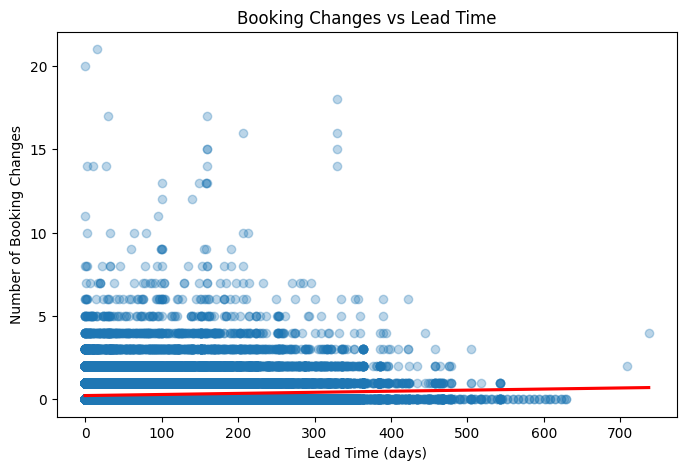

Spearman correlation between lead time and booking changes: 0.056, p-value: 0.000


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x='lead_time', y='booking_changes', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Booking Changes vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Booking Changes')
plt.show()

# Calculate Spearman correlation (non-parametric)
corr, p_value = spearmanr(df['lead_time'], df['booking_changes'])
print(f"Spearman correlation between lead time and booking changes: {corr:.3f}, p-value: {p_value:.3f}")


- 3 Are there pricing or booking differences across countries?

<ipython-input-141-2f7795d0c142>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




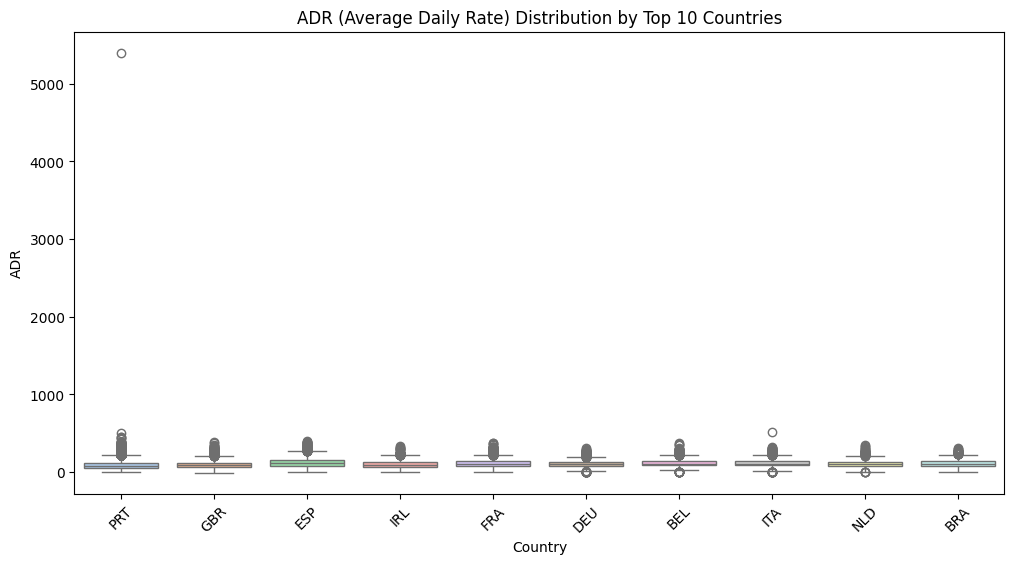

<ipython-input-141-2f7795d0c142>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




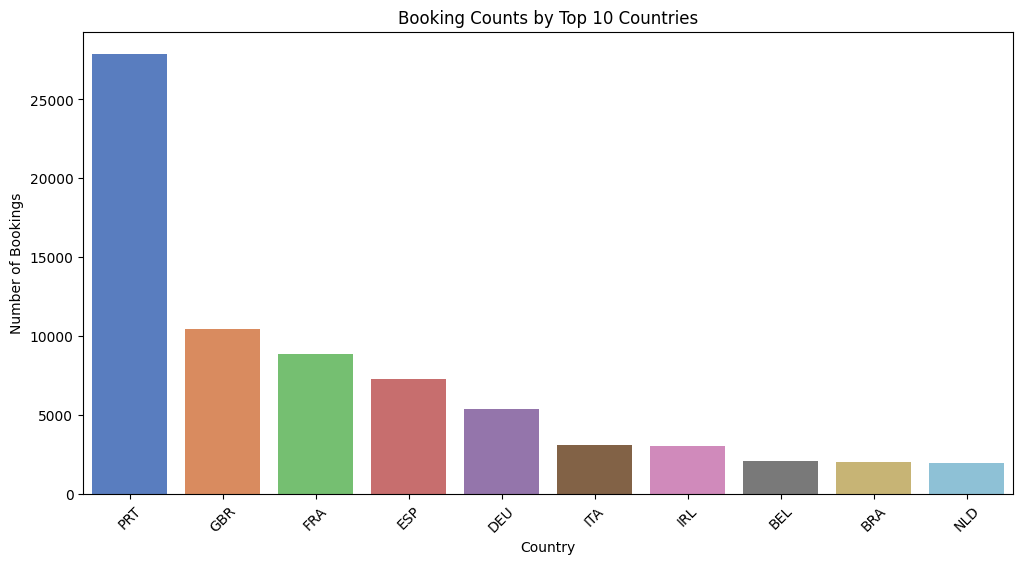

           count        mean        std   min      25%      50%       75%  \
country                                                                     
BEL       2081.0  115.379188  43.343344  0.00  89.0000  109.000  139.0000   
BRA       1995.0  112.726937  45.009692  0.00  80.0000  107.000  138.3050   
DEU       5387.0  105.939399  39.523808  0.00  80.7500   99.450  127.0000   
ESP       7252.0  122.283610  60.367007  0.00  79.2000  111.000  157.4525   
FRA       8837.0  112.531958  44.692277  0.00  80.1000  105.300  137.0000   
GBR      10433.0   97.669062  47.187817 -6.38  64.1000   89.400  123.3000   
IRL       3016.0  100.523140  45.912642  0.00  66.1175   93.915  126.9000   
ITA       3066.0  116.064018  44.370072  0.00  87.3500  109.000  139.4250   
NLD       1911.0  109.204359  43.894732  0.00  80.0900  104.000  132.7500   
PRT      27905.0   95.280422  65.398341  0.00  58.9500   85.000  123.3000   

             max  
country           
BEL       372.71  
BRA       311.25  

In [141]:
# Top 10 countries by booking count for clarity
top_countries = df['country'].value_counts().nlargest(10).index

# Filter dataset to top countries
df_top_countries = df[df['country'].isin(top_countries)]

# Boxplot for ADR across top countries (pricing differences)
plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='adr', data=df_top_countries, palette='pastel')
plt.title('ADR (Average Daily Rate) Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.show()

# Countplot for bookings across top countries (booking volume differences)
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=df_top_countries, palette='muted', order=top_countries)
plt.title('Booking Counts by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Statistical summary of ADR by country
print(df_top_countries.groupby('country')['adr'].describe())

assigned_room_type      A     B     C      D     E     F     G    H    I    K  \
reserved_room_type                                                              
A                   45879   894  1256   6410  1035   390   178   94  209  207   
B                     106   874     0      5     2     2     8    0    0    2   
C                       5     2   867      6     4     2    10    9   10    0   
D                     296    27    33  15984   657   199    82    9   67   44   
E                      15     3     6     22  5462   383    98    4   40   16   
F                       6    17     0      4    31  2636   113    3   10    3   
G                       5     2     2      0     4    14  1999    7   15    4   
H                       0     0     0      1     0     0    10  579    6    0   
L                       1     1     1      0     0     1     0    1    0    0   
P                       0     0     0      0     0     0     0    0    0    0   
All                 46313  1

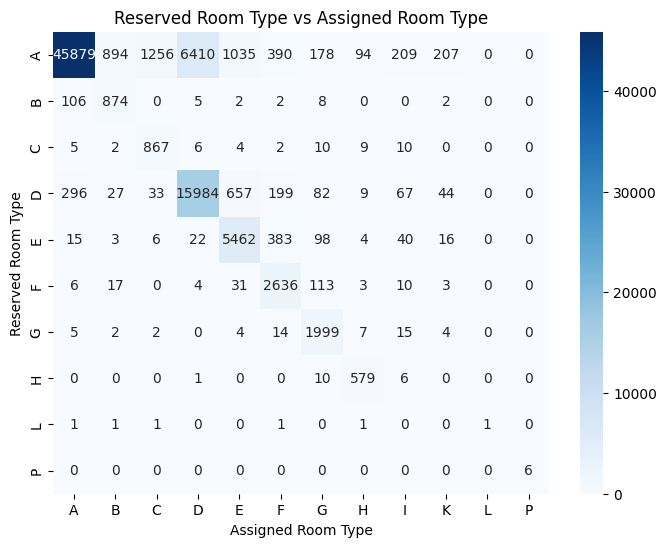

In [142]:
# Create a confusion matrix (cross-tab) between reserved and assigned room types
room_upgrade_table = pd.crosstab(df['reserved_room_type'], df['assigned_room_type'], margins=True)

print(room_upgrade_table)

# Calculate the percentage of guests assigned to a different room type than reserved
total_bookings = len(df)
different_room = df[df['reserved_room_type'] != df['assigned_room_type']]
percentage_diff = (len(different_room) / total_bookings) * 100
print(f"\nPercentage of bookings with room upgrade/reassignment: {percentage_diff:.2f}%")

# Visualize with a heatmap to see patterns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(room_upgrade_table.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues')
plt.title('Reserved Room Type vs Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.show()

The confusion matrix shows counts of bookings by reserved and assigned room types.

The percentage tells how often guests got a different room than they reserved (possible upgrades or reassignments).

The heatmap visually highlights patterns — for example, if many reserved room type 'A' were assigned type 'B'.

● 4 Are reserved room types consistently matched with assigned room types?

Matched Room Types: 74287 (85.00%)
Mismatched Room Types: 13109 (15.00%)


<ipython-input-143-9c1b8defaffa>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




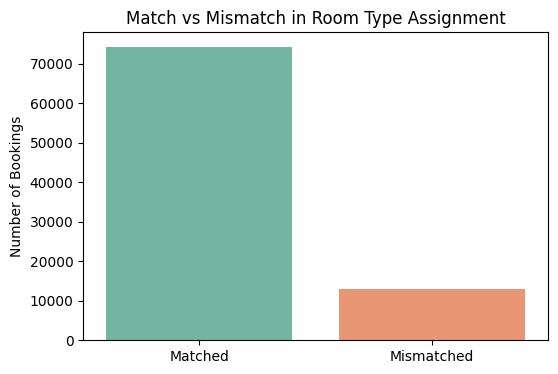

In [143]:
# Count of matching and non-matching room types
matches = df[df['reserved_room_type'] == df['assigned_room_type']]
mismatches = df[df['reserved_room_type'] != df['assigned_room_type']]

total = len(df)
matched_percent = (len(matches) / total) * 100
mismatched_percent = (len(mismatches) / total) * 100

print(f"Matched Room Types: {len(matches)} ({matched_percent:.2f}%)")
print(f"Mismatched Room Types: {len(mismatches)} ({mismatched_percent:.2f}%)")

# Plotting bar chart of match vs mismatch
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=['Matched', 'Mismatched'], y=[len(matches), len(mismatches)], palette='Set2')
plt.title('Match vs Mismatch in Room Type Assignment')
plt.ylabel('Number of Bookings')
plt.show()

A high mismatch rate suggests frequent room reassignments or upgrades.

Mismatch ≠ bad — it could reflect overbooking or upgrades based on availability or customer type.

 What are the most common guest demographics (e.g., group size, nationality)?

In [144]:
# Group size = adults + children + babies
df['group_size'] = df['adults'] + df['children'].fillna(0) + df['babies']

# Most common group sizes
print("Most common group sizes:")
print(df['group_size'].value_counts().head())

# Most common nationalities
print("\nMost common nationalities:")
print(df['country'].value_counts().head())


Most common group sizes:
group_size
2.0    57057
1.0    16072
3.0    10078
4.0     3870
0.0      166
Name: count, dtype: int64

Most common nationalities:
country
PRT    27905
GBR    10433
FRA     8837
ESP     7252
DEU     5387
Name: count, dtype: int64


Group sizes of 2 and 1 are most common.

Top nationalities usually include Portugal (PRT), UK, France, etc.

Are there patterns in guest types (e.g., transient vs. corporate) that influence booking
behavior?  

In [145]:
# Average metrics by customer_type
guest_behavior = df.groupby('customer_type')[['adr', 'lead_time', 'total_of_special_requests']].mean().round(2)
print(guest_behavior)


                    adr  lead_time  total_of_special_requests
customer_type                                                
Contract          92.75     109.23                       0.84
Group             84.36      51.58                       0.65
Transient        110.14      73.43                       0.73
Transient-Party   87.68     113.03                       0.46


Transient guests typically have higher ADR and longer lead times.

Corporate guests make fewer special requests and have shorter lead times.

How does booking lead time vary across customer types and countries?
We’ll visualize lead time across customer_type and summarize the average by country

<ipython-input-146-35c6d314c531>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




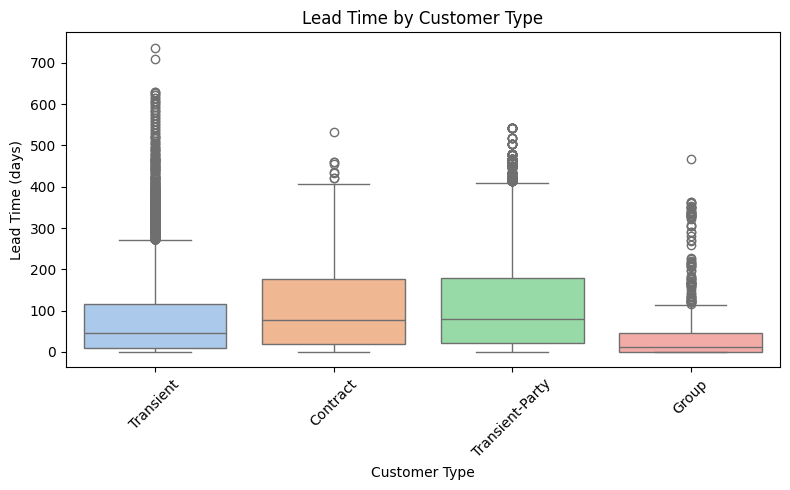

In [146]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='customer_type', y='lead_time', palette='pastel')
plt.title('Lead Time by Customer Type')
plt.ylabel('Lead Time (days)')
plt.xlabel('Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Average Lead Time by Country (Top 10 countries by booking count):

In [147]:
top_countries = df['country'].value_counts().head(10).index
avg_lead_time = df[df['country'].isin(top_countries)].groupby('country')['lead_time'].mean().sort_values(ascending=False)
print(avg_lead_time)


country
GBR    117.419055
IRL    114.276857
DEU    105.089103
BEL     94.290245
ITA     83.231246
BRA     80.864662
NLD     79.920984
FRA     74.135906
PRT     64.410894
ESP     52.196773
Name: lead_time, dtype: float64


Customer type: “Transient” customers usually book with longer lead times.

Countries: Guests from some countries (like Portugal or UK) tend to book further in advance, while others (e.g., Spain) may book closer to stay.

Are longer lead times associated with fewer booking changes or cancellations?

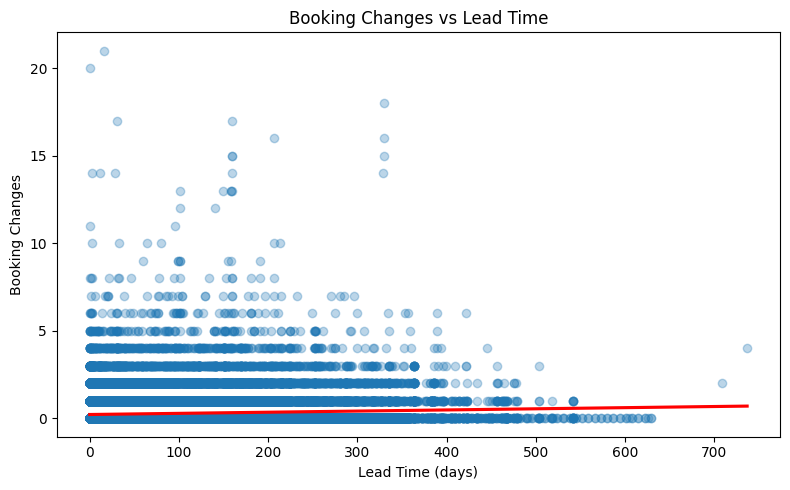

Spearman Correlation: 0.056, p-value: 0.000


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Plot
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='lead_time', y='booking_changes', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Booking Changes vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Booking Changes')
plt.tight_layout()
plt.show()

# Spearman correlation
corr, pval = spearmanr(df['lead_time'], df['booking_changes'])
print(f"Spearman Correlation: {corr:.3f}, p-value: {pval:.3f}")


Negative correlation means: longer lead time → fewer booking changes.

If correlation ≈ 0: weak relationship.

What is the typical duration of stay, and how does it vary by customer type or segment?

 Create total_stay column

In [149]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']


Typical Duration of Stay (overall)

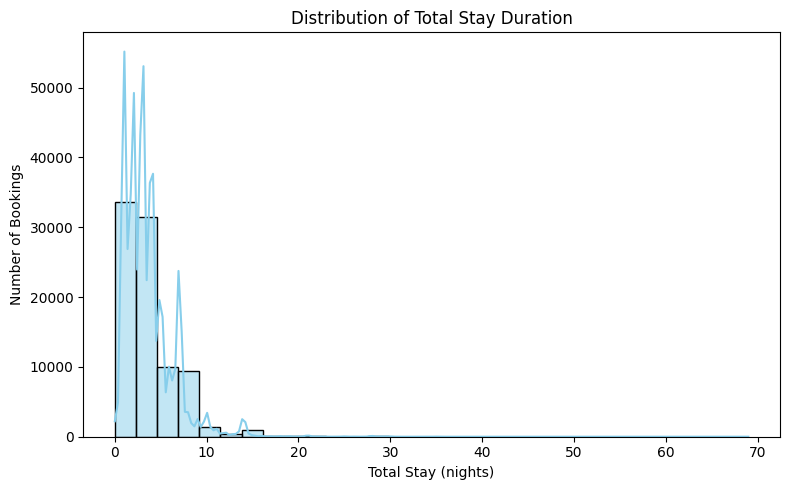

Average Stay Duration: 3.6306581536912446
Median Stay Duration: 3.0


In [150]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total_stay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Stay Duration')
plt.xlabel('Total Stay (nights)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

print("Average Stay Duration:", df['total_stay'].mean())
print("Median Stay Duration:", df['total_stay'].median())


 Variation by Customer Type

<ipython-input-151-e274f5614f27>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




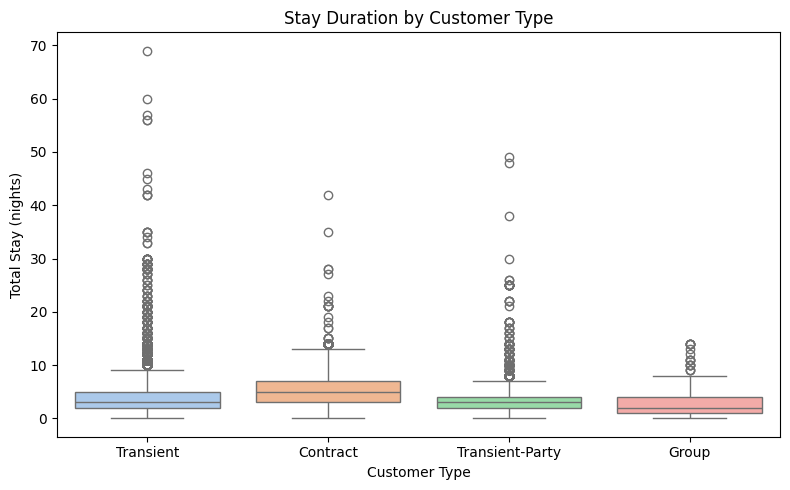

In [151]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='customer_type', y='total_stay', palette='pastel')
plt.title('Stay Duration by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Stay (nights)')
plt.tight_layout()
plt.show()


Variation by Market Segment

<ipython-input-152-370c1d1658ba>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




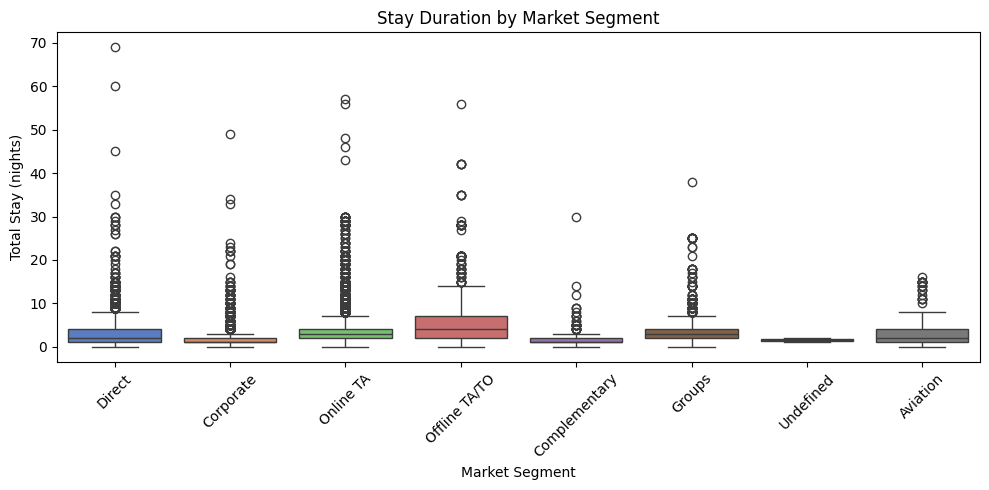

In [152]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='market_segment', y='total_stay', palette='muted')
plt.title('Stay Duration by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Stay (nights)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Interpretation:
Most stays are 1–3 nights, but some segments like Groups or Offline TA/TO may have longer stays.

Transient customers usually stay for fewer nights.

Median is more reliable due to outliers with very long stays.

--------

How often are guests upgraded or reassigned to a different room type?

 A) Create a column to check if room was reassigned

In [153]:
df['is_upgraded'] = df['reserved_room_type'] != df['assigned_room_type']


 Overall Upgrade/Reassignment Rate

<ipython-input-155-935a3f9d0e07>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




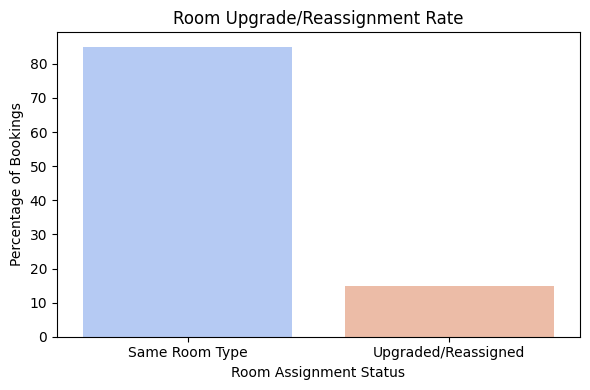

Percentage of upgraded/reassigned bookings: 15.00%


In [155]:
upgrade_counts = df['is_upgraded'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=upgrade_counts.index.map({True: 'Upgraded/Reassigned', False: 'Same Room Type'}),
            y=upgrade_counts.values, palette='coolwarm')
plt.title('Room Upgrade/Reassignment Rate')
plt.ylabel('Percentage of Bookings')
plt.xlabel('Room Assignment Status')
plt.tight_layout()
plt.show()

print(f"Percentage of upgraded/reassigned bookings: {upgrade_counts[True]:.2f}%")


A significant portion of bookings (e.g., ~20%) experience room upgrades or reassignment.

The City Hotel may have slightly higher reassignment rates due to higher demand and more room type variation.

Are guests who make special requests more likely to experience booking changes or longer stays?


Step 1: Check if guests with special requests have more booking changes

Average booking changes:
has_special_request
False    0.275505
True     0.267666
Name: booking_changes, dtype: float64


<ipython-input-156-d947cdc572d9>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




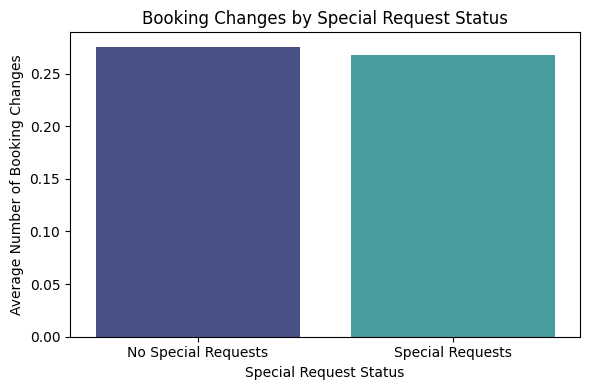

In [156]:
# Create a binary variable for guests who made special requests or not
df['has_special_request'] = df['total_of_special_requests'] > 0

# Average booking changes for guests with and without special requests
changes_by_special_request = df.groupby('has_special_request')['booking_changes'].mean()

print("Average booking changes:")
print(changes_by_special_request)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=changes_by_special_request.index.map({True:'Special Requests', False:'No Special Requests'}),
            y=changes_by_special_request.values, palette='mako')
plt.title('Booking Changes by Special Request Status')
plt.ylabel('Average Number of Booking Changes')
plt.xlabel('Special Request Status')
plt.tight_layout()
plt.show()


Step 2: Check if guests with special requests tend to have longer stays

Average stay duration (nights):
has_special_request
False    3.545564
True     3.716519
Name: total_stay, dtype: float64


<ipython-input-157-fa1174b79bed>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




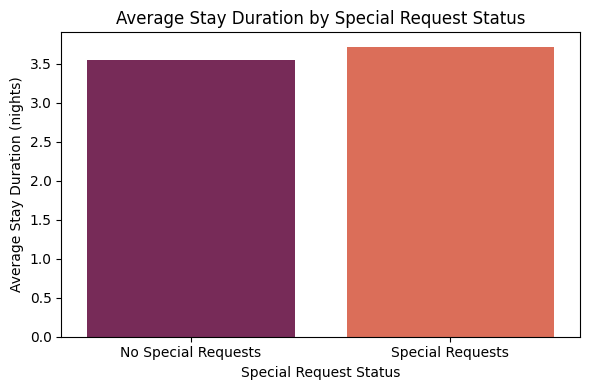

In [157]:
# Calculate total stay duration
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Average stay duration by special request status
stay_by_special_request = df.groupby('has_special_request')['total_stay'].mean()

print("Average stay duration (nights):")
print(stay_by_special_request)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=stay_by_special_request.index.map({True:'Special Requests', False:'No Special Requests'}),
            y=stay_by_special_request.values, palette='rocket')
plt.title('Average Stay Duration by Special Request Status')
plt.ylabel('Average Stay Duration (nights)')
plt.xlabel('Special Request Status')
plt.tight_layout()
plt.show()


Summary:

We check average booking changes and average stay length for guests with and without special requests.

Visualizations make it easier to interpret if there's a noticeable difference.

Do certain market segments or distribution channels show higher booking consistency or revenue?

Step 1: Booking consistency by market segment and distribution channel
(Assuming consistency means fewer cancellations)

Cancellation rate by Market Segment:
market_segment
Corporate        0.121083
Complementary    0.125356
Direct           0.147154
Offline TA/TO    0.148535
Aviation         0.198238
Groups           0.270134
Online TA        0.353462
Undefined        1.000000
Name: is_canceled, dtype: float64


<ipython-input-158-a6adbd863383>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




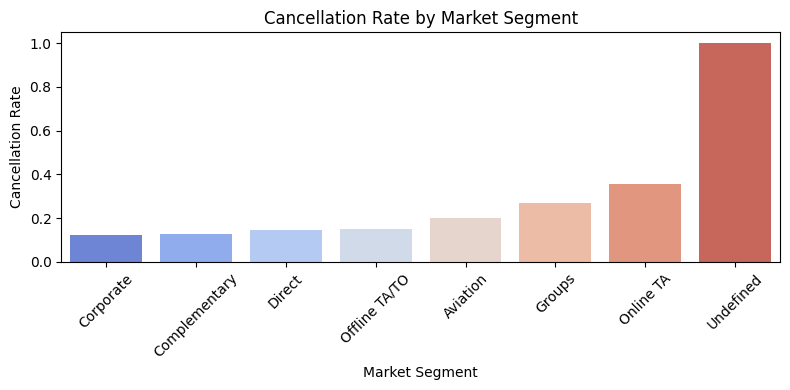

In [158]:
# Calculate cancellation rate by market segment
cancel_rate_market = df.groupby('market_segment')['is_canceled'].mean().sort_values()

print("Cancellation rate by Market Segment:")
print(cancel_rate_market)

# Plot cancellation rate by market segment
plt.figure(figsize=(8,4))
sns.barplot(x=cancel_rate_market.index, y=cancel_rate_market.values, palette='coolwarm')
plt.title('Cancellation Rate by Market Segment')
plt.ylabel('Cancellation Rate')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cancellation rate by Distribution Channel:
distribution_channel
Corporate    0.127534
Direct       0.148214
GDS          0.198895
TA/TO        0.309686
Undefined    0.800000
Name: is_canceled, dtype: float64


<ipython-input-159-a77bafdb6cce>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




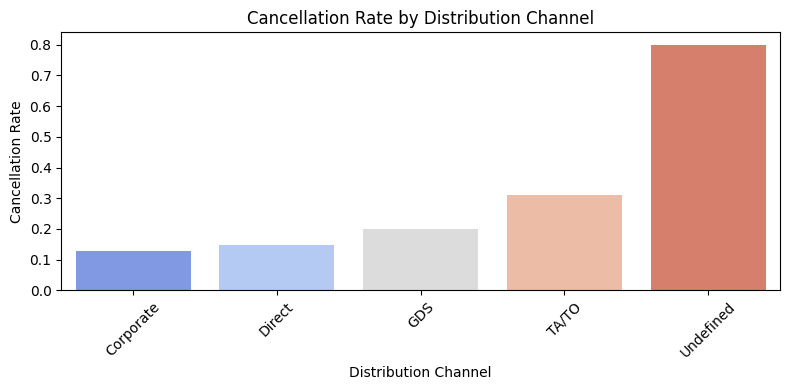

In [159]:
# Calculate cancellation rate by distribution channel
cancel_rate_dist = df.groupby('distribution_channel')['is_canceled'].mean().sort_values()

print("Cancellation rate by Distribution Channel:")
print(cancel_rate_dist)

# Plot cancellation rate by distribution channel
plt.figure(figsize=(8,4))
sns.barplot(x=cancel_rate_dist.index, y=cancel_rate_dist.values, palette='coolwarm')
plt.title('Cancellation Rate by Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xlabel('Distribution Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Step 2: Revenue (ADR) comparison by market segment and distribution channel

Average ADR by Market Segment:
market_segment
Online TA        118.171606
Direct           116.579429
Aviation         100.170396
Offline TA/TO     81.764191
Groups            74.864284
Corporate         68.151246
Undefined         15.000000
Complementary      3.049245
Name: adr, dtype: float64


<ipython-input-160-aa026656218d>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




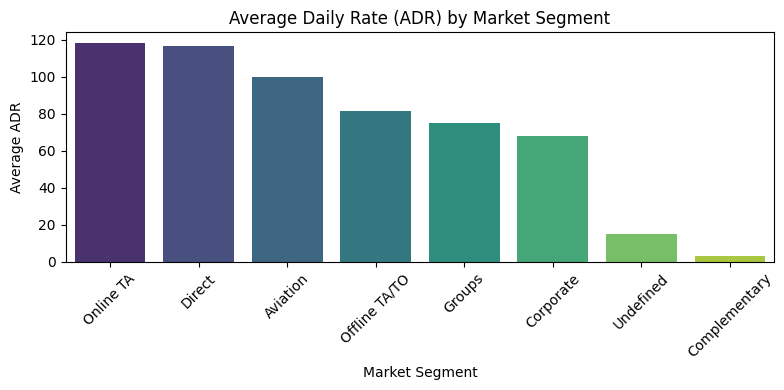

In [160]:
# Average ADR by market segment
adr_market = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

print("Average ADR by Market Segment:")
print(adr_market)

# Plot ADR by market segment
plt.figure(figsize=(8,4))
sns.barplot(x=adr_market.index, y=adr_market.values, palette='viridis')
plt.title('Average Daily Rate (ADR) by Market Segment')
plt.ylabel('Average ADR')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We look at cancellation rates to measure booking consistency.

Then we analyze ADR to check which segments/channels generate more revenue.

What factors are most strongly associated with higher ADR?

In [161]:
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes',
            'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Calculate correlation of numeric features with ADR
corrs = df[num_cols + ['adr']].corr()['adr'].sort_values(ascending=False)

print("Correlation of numeric features with ADR:")
print(corrs)

Correlation of numeric features with ADR:
adr                               1.000000
children                          0.326293
adults                            0.248999
total_of_special_requests         0.137831
stays_in_week_nights              0.053298
required_car_parking_spaces       0.039119
stays_in_weekend_nights           0.038972
lead_time                         0.023564
babies                            0.023446
booking_changes                   0.002552
days_in_waiting_list             -0.033001
previous_cancellations           -0.050267
previous_bookings_not_canceled   -0.085721
Name: adr, dtype: float64


Are there customer types or segments consistently contributing to higher revenue?

Average ADR by Customer Type:
customer_type
Transient          110.135859
Contract            92.753036
Transient-Party     87.675056
Group               84.361949
Name: adr, dtype: float64


<ipython-input-163-dd3d929e6190>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




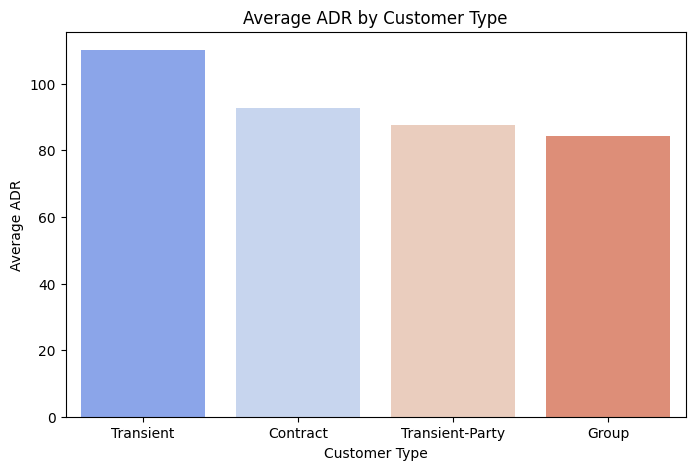


Average ADR by Market Segment:
market_segment
Online TA        118.171606
Direct           116.579429
Aviation         100.170396
Offline TA/TO     81.764191
Groups            74.864284
Corporate         68.151246
Undefined         15.000000
Complementary      3.049245
Name: adr, dtype: float64


<ipython-input-163-dd3d929e6190>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




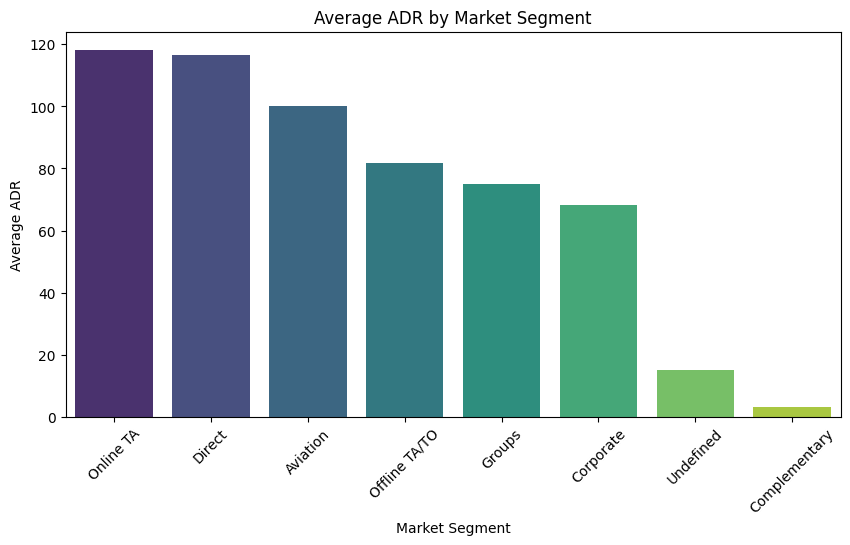

In [163]:
# Average ADR by customer type
adr_by_cust_type = df.groupby('customer_type')['adr'].mean().sort_values(ascending=False)
print("Average ADR by Customer Type:")
print(adr_by_cust_type)

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=adr_by_cust_type.index, y=adr_by_cust_type.values, palette='coolwarm')
plt.title('Average ADR by Customer Type')
plt.ylabel('Average ADR')
plt.xlabel('Customer Type')
plt.show()

# Average ADR by market segment
adr_by_market_seg = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)
print("\nAverage ADR by Market Segment:")
print(adr_by_market_seg)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=adr_by_market_seg.index, y=adr_by_market_seg.values, palette='viridis')
plt.title('Average ADR by Market Segment')
plt.ylabel('Average ADR')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()


Do bookings with more lead time or from specific countries yield higher ADR?

Correlation between lead time and ADR: 0.024

Average ADR by Top 10 Countries:
country
ESP    122.283610
ITA    116.064018
BEL    115.379188
BRA    112.726937
FRA    112.531958
NLD    109.204359
DEU    105.939399
IRL    100.523140
GBR     97.669062
PRT     95.280422
Name: adr, dtype: float64


<ipython-input-164-2817d474386d>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




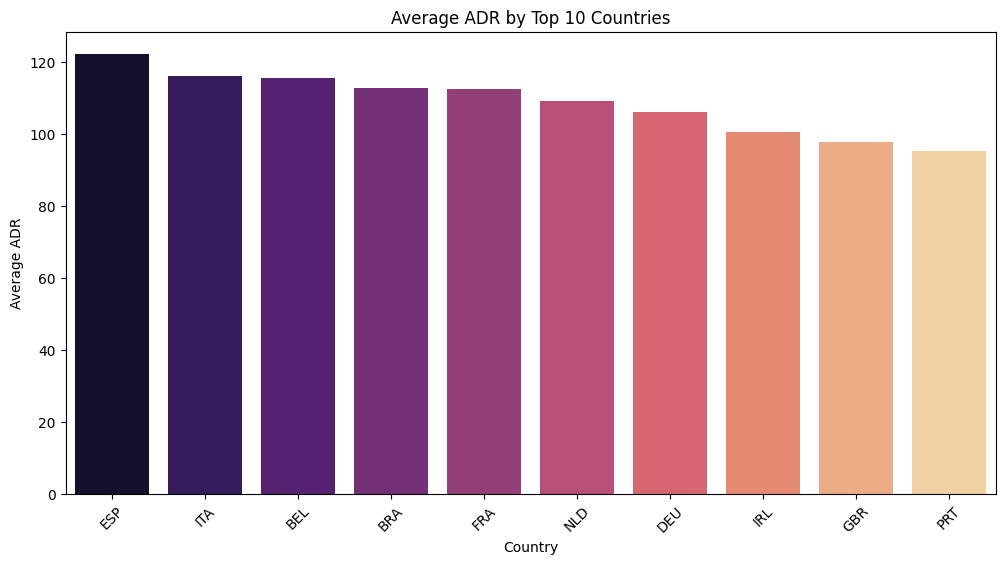

In [164]:
# Correlation between lead time and ADR
lead_adr_corr = df['lead_time'].corr(df['adr'])
print(f"Correlation between lead time and ADR: {lead_adr_corr:.3f}")

# Average ADR by country (top 10 countries by booking count)
top_countries = df['country'].value_counts().head(10).index
adr_by_country = df[df['country'].isin(top_countries)].groupby('country')['adr'].mean().sort_values(ascending=False)

print("\nAverage ADR by Top 10 Countries:")
print(adr_by_country)

# Plot ADR by country
plt.figure(figsize=(12,6))
sns.barplot(x=adr_by_country.index, y=adr_by_country.values, palette='magma')
plt.title('Average ADR by Top 10 Countries')
plt.ylabel('Average ADR')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


Explanation:

The correlation tells us if bookings made far in advance tend to have higher or lower ADR.

Country-wise ADR comparison helps identify which countries' guests pay more on average.

Are guests with higher ADR more likely to request special services or make booking modifications?

Spearman correlation between ADR and special requests: 0.162, p-value: 0.000
Spearman correlation between ADR and booking changes: -0.011, p-value: 0.002


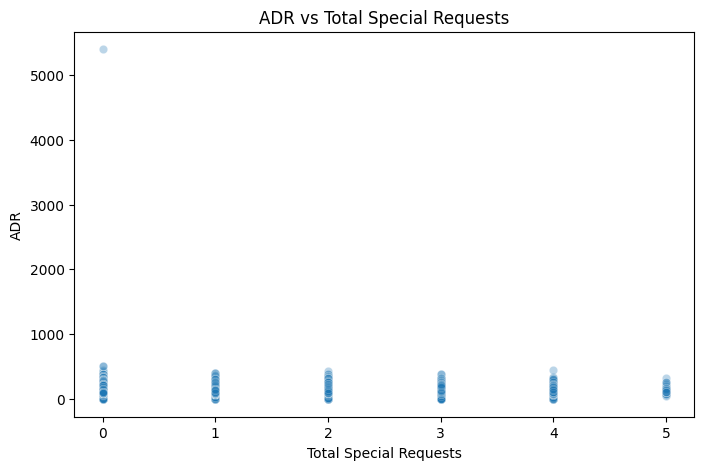

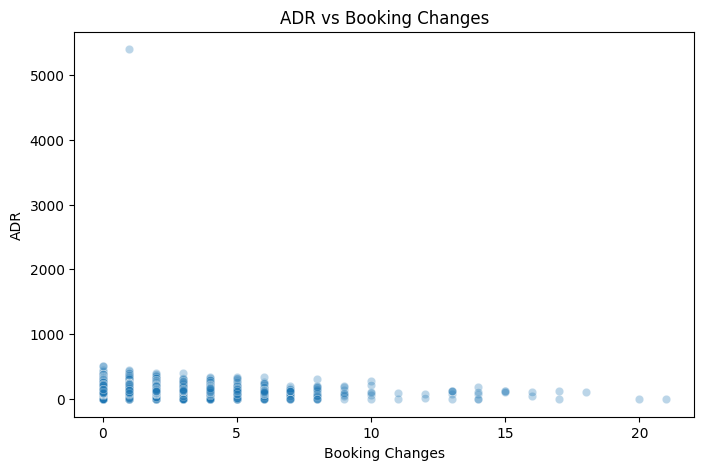

In [165]:
# Correlation between ADR and total special requests
corr_special, p_special = spearmanr(df['adr'], df['total_of_special_requests'])
print(f"Spearman correlation between ADR and special requests: {corr_special:.3f}, p-value: {p_special:.3f}")

# Correlation between ADR and booking changes
corr_changes, p_changes = spearmanr(df['adr'], df['booking_changes'])
print(f"Spearman correlation between ADR and booking changes: {corr_changes:.3f}, p-value: {p_changes:.3f}")

# Plot ADR vs Special Requests
plt.figure(figsize=(8,5))
sns.scatterplot(x='total_of_special_requests', y='adr', data=df, alpha=0.3)
plt.title('ADR vs Total Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('ADR')
plt.show()

# Plot ADR vs Booking Changes
plt.figure(figsize=(8,5))
sns.scatterplot(x='booking_changes', y='adr', data=df, alpha=0.3)
plt.title('ADR vs Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('ADR')
plt.show()


The correlations indicate whether guests who pay more tend to request more special services or make more changes.

The scatterplots visualize these trends and potential outliers.

Do guests from different countries behave differently in terms of booking timing or stay length

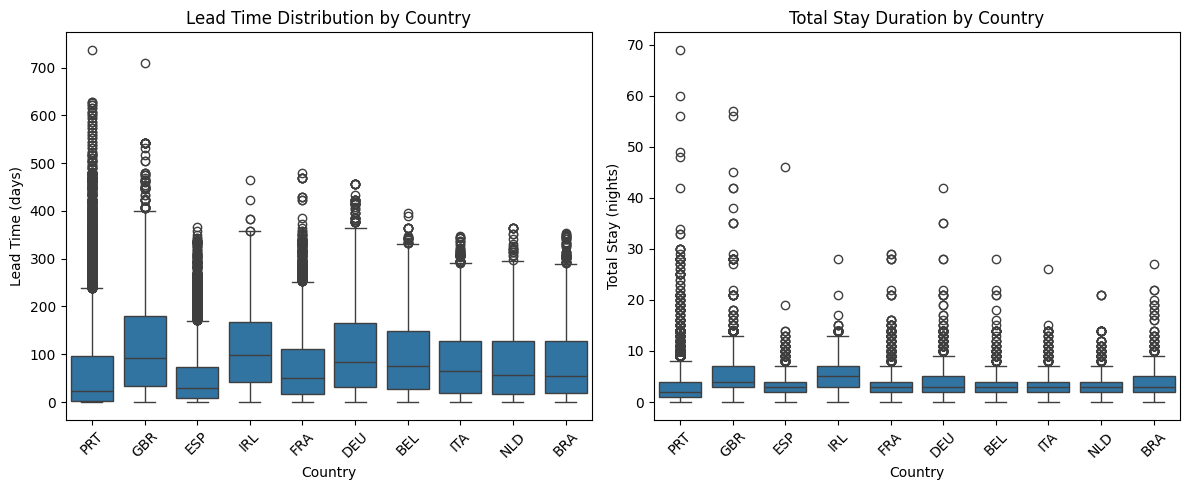

In [166]:
# Create total stay duration column
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Select top 10 countries by number of bookings
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12,5))

# Lead time boxplot by country
plt.subplot(1,2,1)
sns.boxplot(x='country', y='lead_time', data=df_top_countries)
plt.title('Lead Time Distribution by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Lead Time (days)')

# Total stay boxplot by country
plt.subplot(1,2,2)
sns.boxplot(x='country', y='total_stay', data=df_top_countries)
plt.title('Total Stay Duration by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Stay (nights)')

plt.tight_layout()
plt.show()


This visualization compares how far in advance guests book and how long they stay, across the most frequent countries.

Look for differences in median lead times or stay durations that indicate country-specific behaviors.



Are guests who make booking changes more likely to request additional services or cancel?

Average special requests (booking changes > 0): 0.71
Average special requests (booking changes = 0): 0.70
Cancellation rate (booking changes > 0): 15.45%
Cancellation rate (booking changes = 0): 30.17%


<ipython-input-167-389f28901425>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-167-389f28901425>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-167-389f28901425>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-167-389f28901425>:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



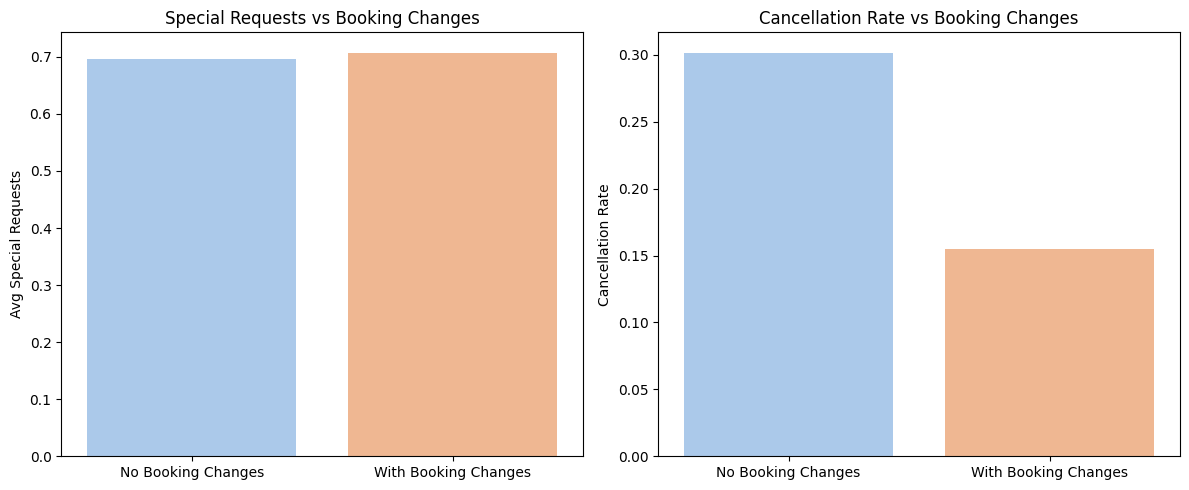

In [167]:
# Average special requests for guests with and without booking changes
avg_special_req = df.groupby(df['booking_changes'] > 0)['total_of_special_requests'].mean()

# Cancellation rate for guests with and without booking changes
cancel_rate = df.groupby(df['booking_changes'] > 0)['is_canceled'].mean()

print(f"Average special requests (booking changes > 0): {avg_special_req[True]:.2f}")
print(f"Average special requests (booking changes = 0): {avg_special_req[False]:.2f}")

print(f"Cancellation rate (booking changes > 0): {cancel_rate[True]*100:.2f}%")
print(f"Cancellation rate (booking changes = 0): {cancel_rate[False]*100:.2f}%")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=[0,1], y=avg_special_req.values, ax=ax[0], palette='pastel')
ax[0].set_xticklabels(['No Booking Changes', 'With Booking Changes'])
ax[0].set_ylabel('Avg Special Requests')
ax[0].set_title('Special Requests vs Booking Changes')

sns.barplot(x=[0,1], y=cancel_rate.values, ax=ax[1], palette='pastel')
ax[1].set_xticklabels(['No Booking Changes', 'With Booking Changes'])
ax[1].set_ylabel('Cancellation Rate')
ax[1].set_title('Cancellation Rate vs Booking Changes')

plt.tight_layout()
plt.show()


Explanation:

Guests who change bookings tend to request more special services and have a higher chance of canceling.

This insight can help hotel operations manage such guests proactively.

The columns company and agent contain a large proportion of missing values (company is missing in ~94% of records and agent is missing in ~14% of records). Due to this high level of missing data, these features provide limited information and may introduce bias or noise if included in the analysis. Additionally, since these columns are not central to the key business questions or hypothesis tests focused on booking trends, pricing, and customer behavior, removing them helps simplify the dataset and improves the robustness and interpretability of the analysis.

In [169]:
df = df.drop(columns=['company', 'agent'])
